<a href="https://colab.research.google.com/github/SergeiVKalinin/ACerS_AE_2024/blob/main/NanoSurf_SmBFO_90nm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combinatorial Grid Search in NanoSurf

### $Yongtao$ $Liu$     
### $liuy3@ornl.gov$

## Import

In [ ]:
!pip install sidpy
!pip install pyNSID
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3853 sha256=dfb12892f46303104e175d24e4547d08c865f93f31aa2a6df5dbfd8adf18a4b3
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


In [ ]:
import os
import numpy as np
import h5py
import sidpy
import pyNSID
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

Download data

In [ ]:
!gdown https://drive.google.com/uc?id=1rKE6d4T-JHlNOT0K4HExOM83PTHPdy-2

Downloading...
From: https://drive.google.com/uc?id=1rKE6d4T-JHlNOT0K4HExOM83PTHPdy-2
To: /content/90nm.zip
100% 220M/220M [00:03<00:00, 65.5MB/s]


In [ ]:
!unzip /content/90nm.zip

Archive:  /content/90nm.zip
  inflating: 90nm/BEPS_composition0_loop0_0.hf5  
  inflating: 90nm/BEPS_composition0_loop1_0.hf5  
  inflating: 90nm/BEPS_composition0_loop2_0.hf5  
  inflating: 90nm/BEPS_composition1_loop0_0.hf5  
  inflating: 90nm/BEPS_composition1_loop1_0.hf5  
  inflating: 90nm/BEPS_composition1_loop2_0.hf5  
  inflating: 90nm/BEPS_composition10_loop0_0.hf5  
  inflating: 90nm/BEPS_composition10_loop1_0.hf5  
  inflating: 90nm/BEPS_composition10_loop2_0.hf5  
  inflating: 90nm/BEPS_composition11_loop0_0.hf5  
  inflating: 90nm/BEPS_composition11_loop1_0.hf5  
  inflating: 90nm/BEPS_composition11_loop2_0.hf5  
  inflating: 90nm/BEPS_composition12_loop0_0.hf5  
  inflating: 90nm/BEPS_composition12_loop1_0.hf5  
  inflating: 90nm/BEPS_composition12_loop2_0.hf5  
  inflating: 90nm/BEPS_composition13_loop0_0.hf5  
  inflating: 90nm/BEPS_composition13_loop1_0.hf5  
  inflating: 90nm/BEPS_composition13_loop2_0.hf5  
  inflating: 90nm/BEPS_composition14_loop0_0.hf5  
  inflati

In [ ]:
hf = h5py.File(r'/content/90nm/BEPS_composition70_loop0_0.hf5', 'r+')
sidpy.hdf.hdf_utils.print_tree(hf)

/
├ BE Channels
  -----------
  ├ Channels
    --------
    ├ Channels
    ├ channels images
    ├ x axis
    ├ y axis
├ BE Complex Spectra
  ------------------
  ├ Complex Spectra
    ---------------
    ├ Complex Spectra
    ├ c
    ├ location index x
    ├ location index y
├ BE Parameters
  -------------
  ├ frequency
  ├ pulse parameters
  ├ scan size
├ BE Quick Fitting
  ----------------
  ├ Quick Fitting
    -------------
    ├ BE responses
    ├ Quick Fitting
    ├ x axis
    ├ y axis
├ BEPS
  ----
  ├ coordinates
  ├ vdc_waveform


In [ ]:
becx = hf["BE Complex Spectra/Complex Spectra/Complex Spectra"]
becx = np.asarray(becx)
becx.shape

(1, 640, 76)

In [ ]:
becxi = becx.imag
becxr = becx.real

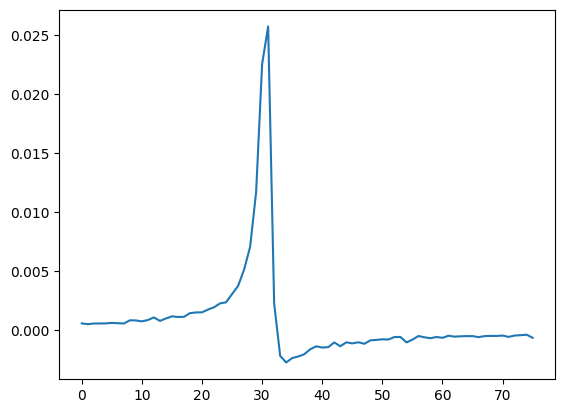

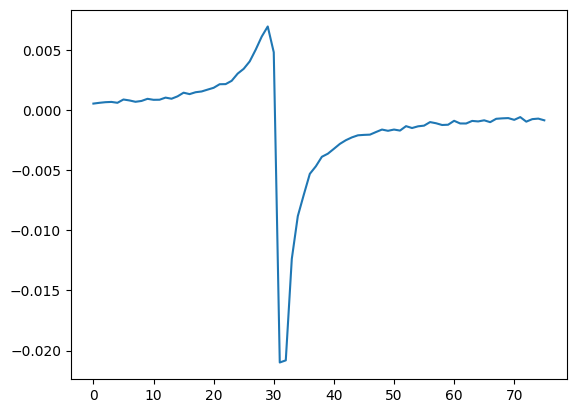

In [ ]:
plt.plot(becxr[0, 10])
plt.show()
plt.plot(becxi[0, 10])

In [ ]:
beps_qf = hf["BE Quick Fitting/Quick Fitting/Quick Fitting"]
beps_wv = np.asarray(hf["BEPS/vdc_waveform"])
on_field_cxr = np.zeros((becx.shape[2], len(beps_wv)))
off_field_cxr = np.zeros((becx.shape[2], len(beps_wv)))
on_field_cxi = np.zeros((becx.shape[2], len(beps_wv)))
off_field_cxi = np.zeros((becx.shape[2], len(beps_wv)))
for k in range (len(beps_wv)):
    on_field_cxr[:, k] = becxr[0,2*k,]
    off_field_cxr[:, k] = becxr[0,1+2*k,]
    on_field_cxi[:, k] = becxi[0,2*k,]
    off_field_cxi[:, k] = becxi[0,1+2*k,]

In [ ]:
beps_qf = hf["BE Quick Fitting/Quick Fitting/Quick Fitting"]
beps_wv = np.asarray(hf["BEPS/vdc_waveform"])

# Plot BEPS results
quick_fit = np.asarray(beps_qf)
# if measure_loops_07 is on and off, we need to seperate on field and off field responses.
on_field_qf = np.zeros((quick_fit.shape[1], len(beps_wv)))
off_field_qf = np.zeros((quick_fit.shape[1], len(beps_wv)))
for k in range (len(beps_wv)):
    on_field_qf[:,k] = quick_fit[0,:,2*k]
    off_field_qf[:,k] = quick_fit[0,:,1+2*k]


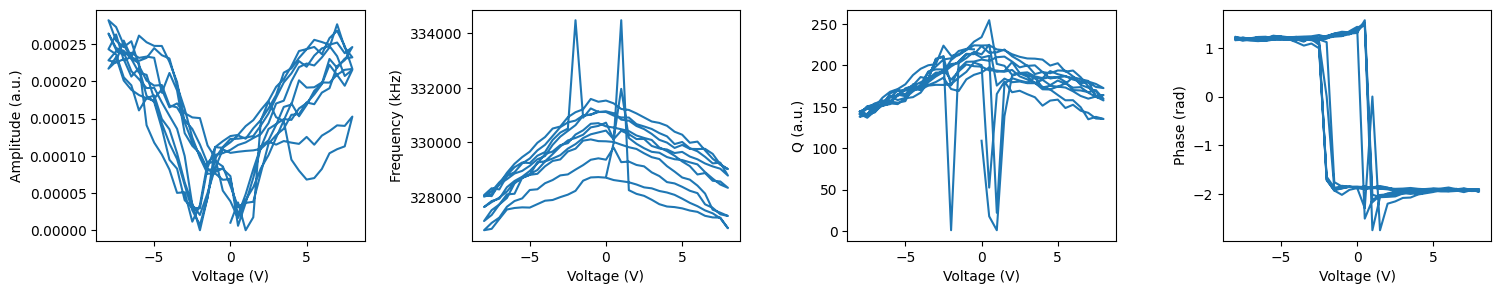

In [ ]:
quick_fit = np.asarray(beps_qf)

# if measure_loops_07 is on and off, we need to seperate on field and off field responses.
on_field_qf = np.zeros((quick_fit.shape[1], len(beps_wv)))
off_field_qf = np.zeros((quick_fit.shape[1], len(beps_wv)))
for k in range (len(beps_wv)):
    on_field_qf[:,k] = quick_fit[0,:,2*k]
    off_field_qf[:,k] = quick_fit[0,:,1+2*k]


###### Plot on field responses ######
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (18, 3), dpi = 100)
f.subplots_adjust(wspace = 0.4)
ax1.plot(beps_wv, on_field_qf[0, ])
ax1.set_xlabel("Voltage (V)"); ax1.set_ylabel("Amplitude (a.u.)")

ax2.plot(beps_wv, on_field_qf[1, ])
ax2.set_xlabel("Voltage (V)"); ax2.set_ylabel("Frequency (kHz)")

ax3.plot(beps_wv, on_field_qf[2, ])
ax3.set_xlabel("Voltage (V)"); ax3.set_ylabel("Q (a.u.)")

ax4.plot(beps_wv, on_field_qf[3, ])
ax4.set_xlabel("Voltage (V)")
ax4.set_ylabel("Phase (rad)")

plt.show()

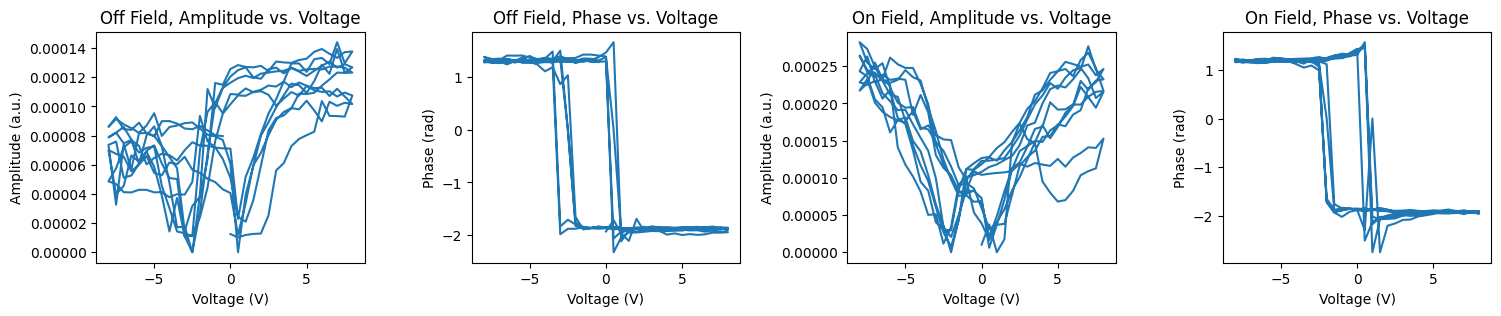

In [ ]:
###### Plot on field and off responses ######
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (18, 3), dpi = 100)
f.subplots_adjust(wspace = 0.4)
ax1.set_title("Off Field, Amplitude vs. Voltage")
ax1.plot(beps_wv, off_field_qf[0, ])
ax1.set_xlabel("Voltage (V)"); ax1.set_ylabel("Amplitude (a.u.)")

ax2.set_title("Off Field, Phase vs. Voltage")
ax2.plot(beps_wv, off_field_qf[3, ])
ax2.set_xlabel("Voltage (V)"); ax2.set_ylabel("Phase (rad)")

ax3.set_title("On Field, Amplitude vs. Voltage")
ax3.plot(beps_wv, on_field_qf[0, ])
ax3.set_xlabel("Voltage (V)"); ax3.set_ylabel("Amplitude (a.u.)")

ax4.set_title("On Field, Phase vs. Voltage")
ax4.plot(beps_wv, on_field_qf[3, ])
ax4.set_xlabel("Voltage (V)")
ax4.set_ylabel("Phase (rad)")

plt.show()

In [ ]:
# Load all 94*3 loops
all_loops = []

for comp in range (94):
  com_loops = []
  for loopnum in range (3):
    hf = h5py.File(r'/content/90nm/BEPS_composition{}_loop{}_0.hf5'.format(comp, loopnum), 'r+')
    beps_qf = hf["BE Quick Fitting/Quick Fitting/Quick Fitting"]
    beps_wv = np.asarray(hf["BEPS/vdc_waveform"])

    com_loops.append(beps_qf)
  all_loops.append(com_loops)

all_loops = np.asarray(all_loops)
all_loops.shape

(94, 3, 1, 4, 640)

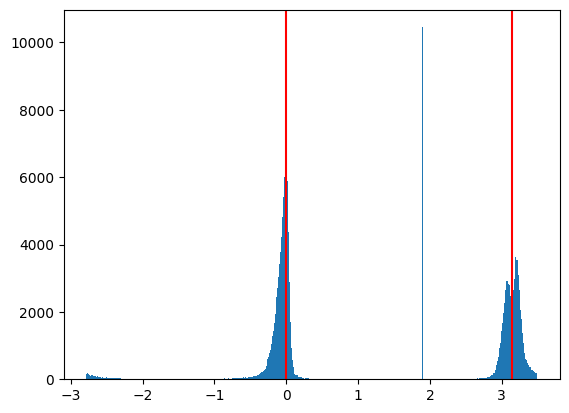

In [ ]:
# correct phase
pha = all_loops[:,:,0,3,:]
mi = np.min(pha)
ma = np.max(pha)

correct_pha = np.where(pha > 1.6, pha + (mi-ma), pha)

correct_pha = correct_pha + np.pi - 1.25

# plot corrected phase
plt.figure()
plt.hist(correct_pha.reshape(-1),bins = 500);
plt.axvline(np.pi, c = 'r')
plt.axvline(0, c = 'r')

In [ ]:
 # Load corrected phase
 all_loops[:,:,0, 3,:] = correct_pha
 all_loops.shape

(94, 3, 1, 4, 640)

In [ ]:
# Separate on field and off field loops
loops_on = np.zeros((94, 3, 4, len(beps_wv)))
loops_off = np.zeros((94, 3, 4, len(beps_wv)))

for k in range (len(beps_wv)):
  loops_on[:,:, :, k] = all_loops[:,:,0, :, 2*k]
  loops_off[:,:, :, k] = all_loops[:,:, 0, :, 1+2*k]

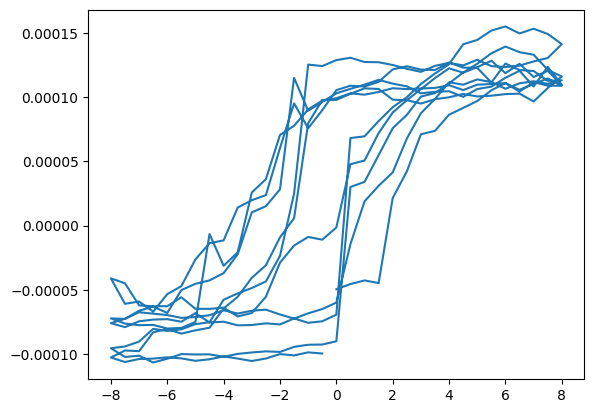

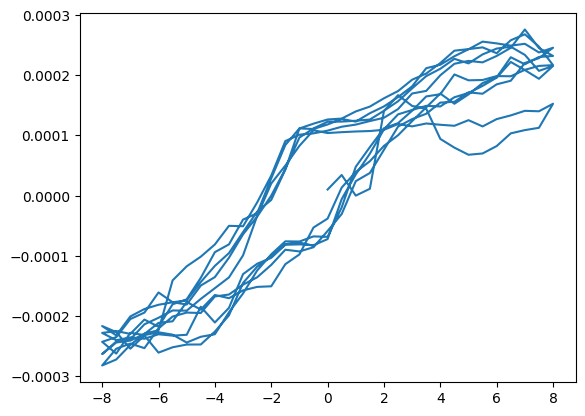

In [ ]:
# Calculate Polarization
pola_off = loops_off[:,:,0,]*np.cos(loops_off[:,:,3,])
pola_on = loops_on[:,:,0,]*np.cos(loops_on[:,:,3,])
plt.plot(beps_wv, pola_off[65, 0, :])
plt.show()
plt.plot(beps_wv, pola_on[70, 0, :])

Text(0.5, 0.9, 'Off Field Response, Blue--> Red corresponds to 20% Sm --> 0% Sm')

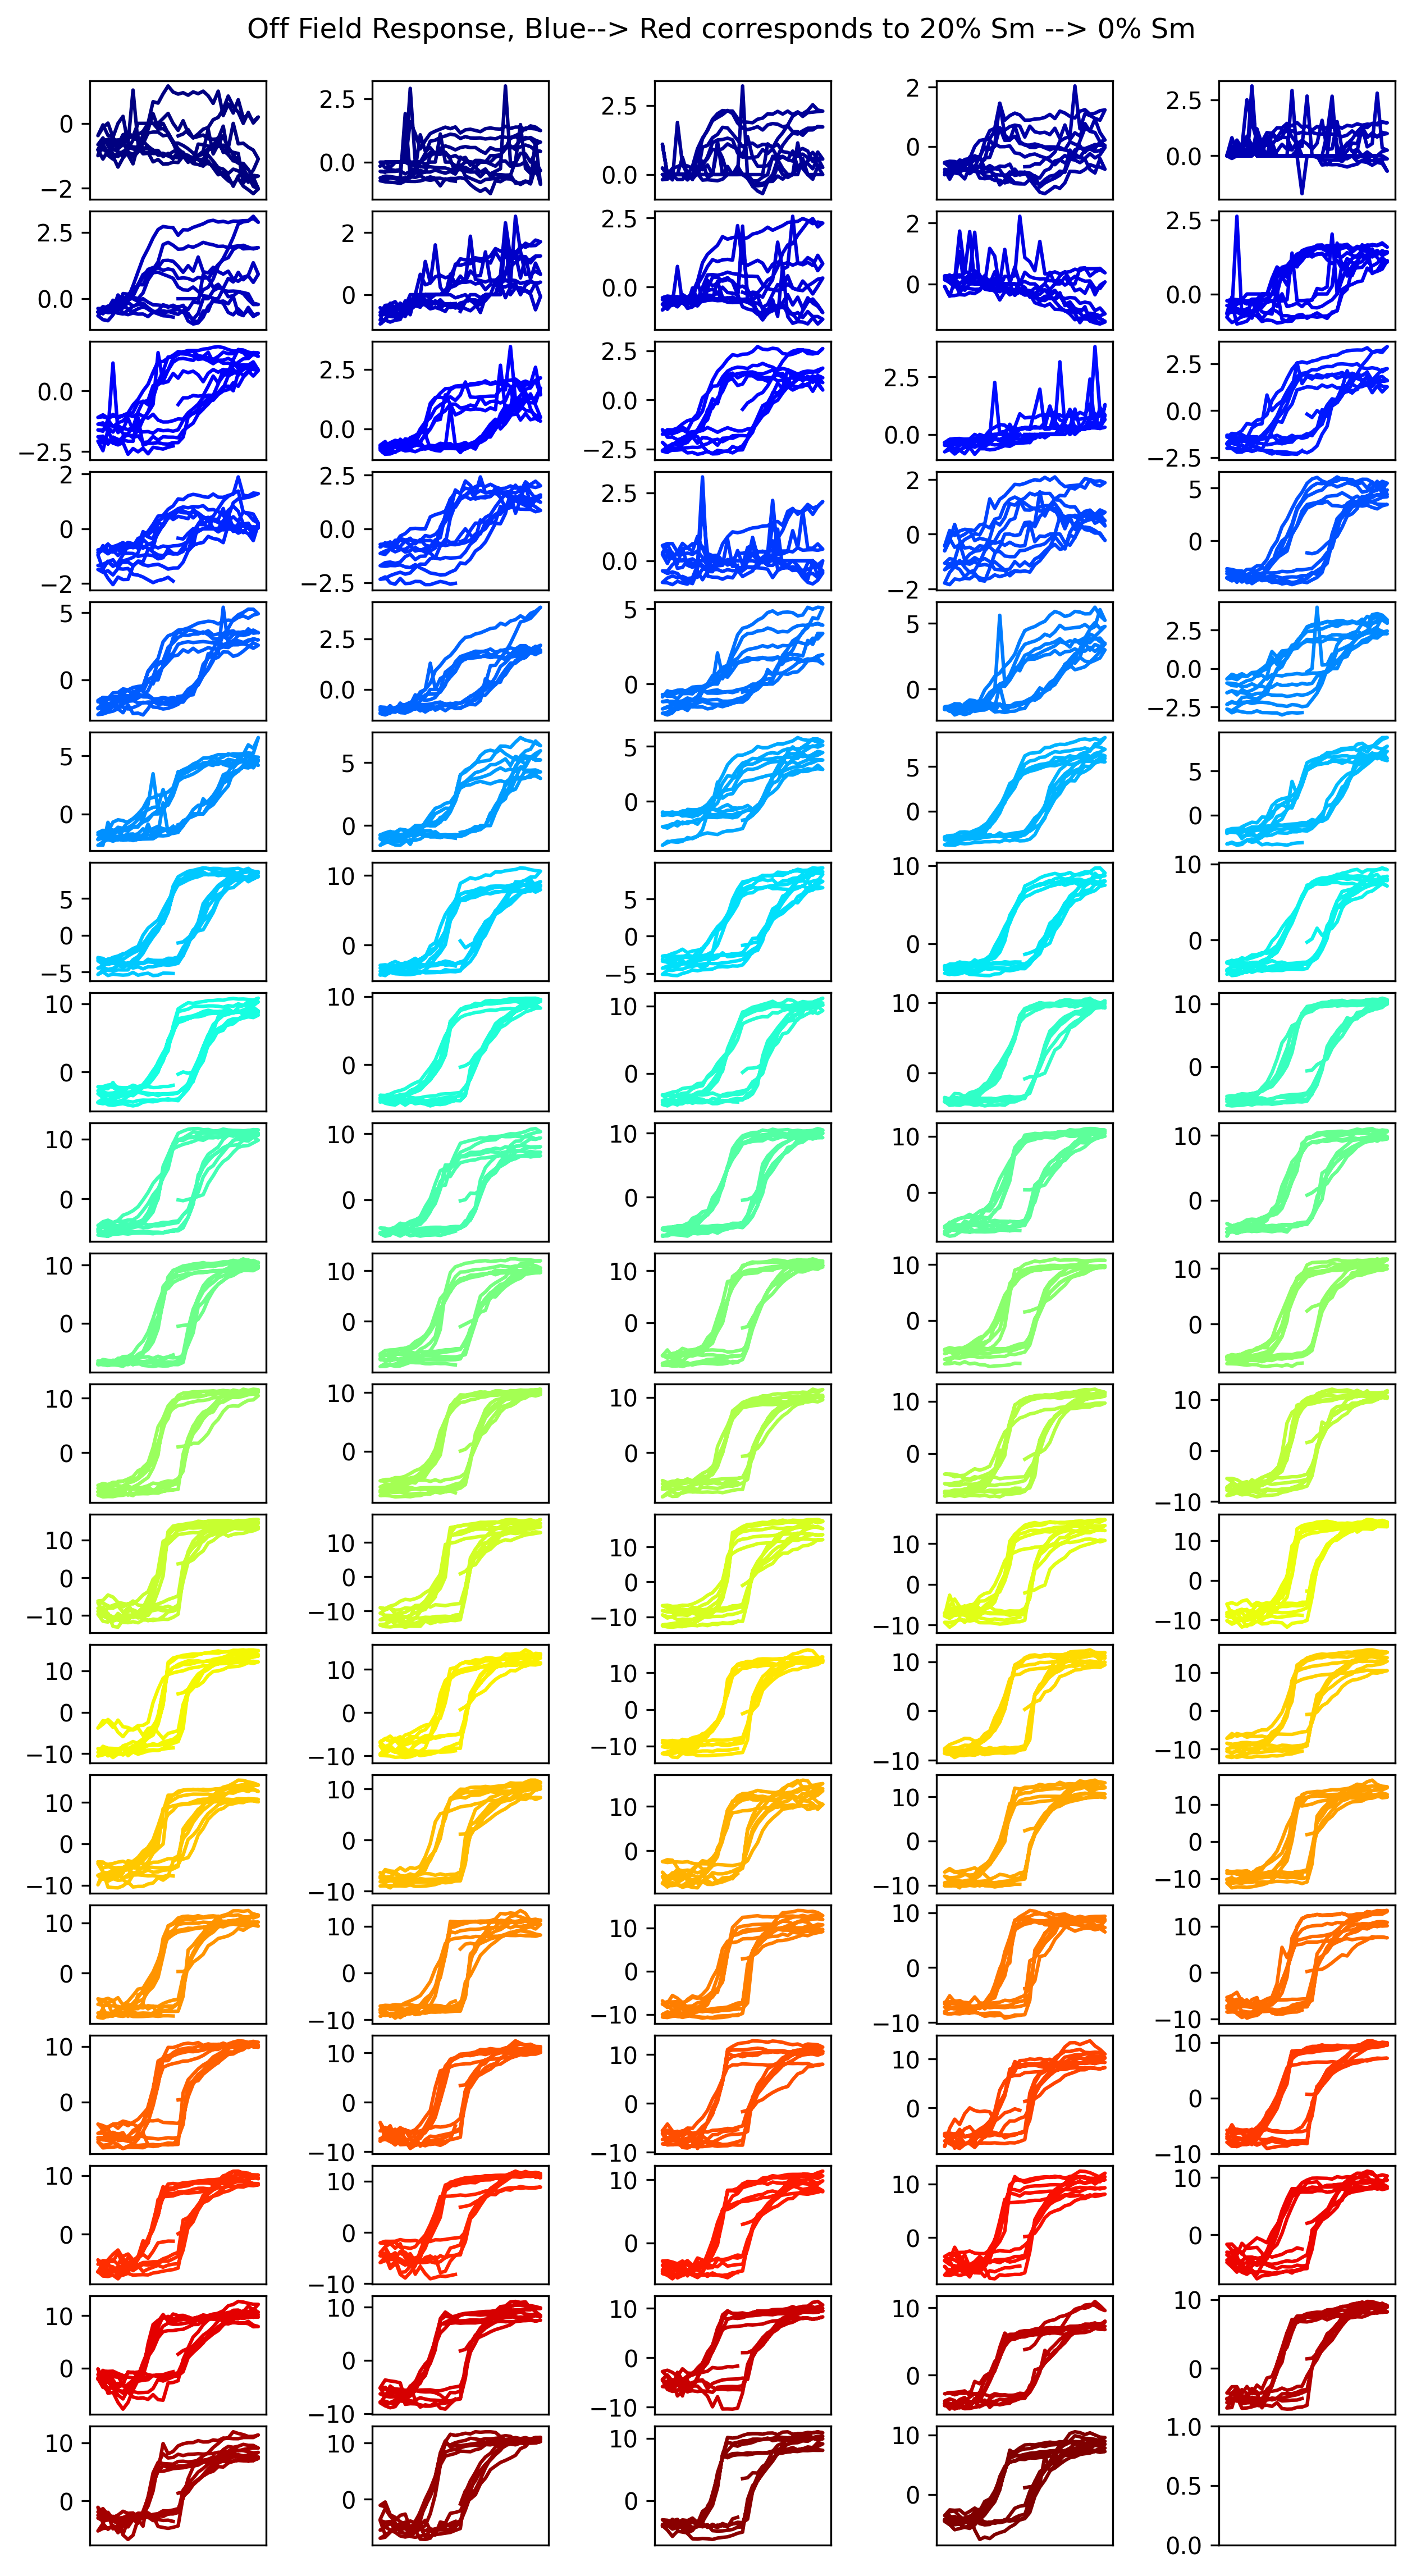

In [ ]:
color=mcp.gen_color(cmap="jet",n=94)
fig, axes = plt.subplots(19, 5, figsize=(10, 19),
                         subplot_kw={'xticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.6), dpi = 300)

for ax, i in zip(axes.flat, range(94)):
  ax.plot(beps_wv, (pola_off.mean(axis = 1)[i])*1E5, c = color[i])
  #ax.set_ylim(-13, 15)
  # ax.set_ylabel ("Piezorespones (a.u.)")

fig.suptitle("Off Field Response, Blue--> Red corresponds to 20% Sm --> 0% Sm", y=0.9)

Text(0.5, 0.9, 'On Field Response, Blue--> Red corresponds to 20% Sm --> 0% Sm')

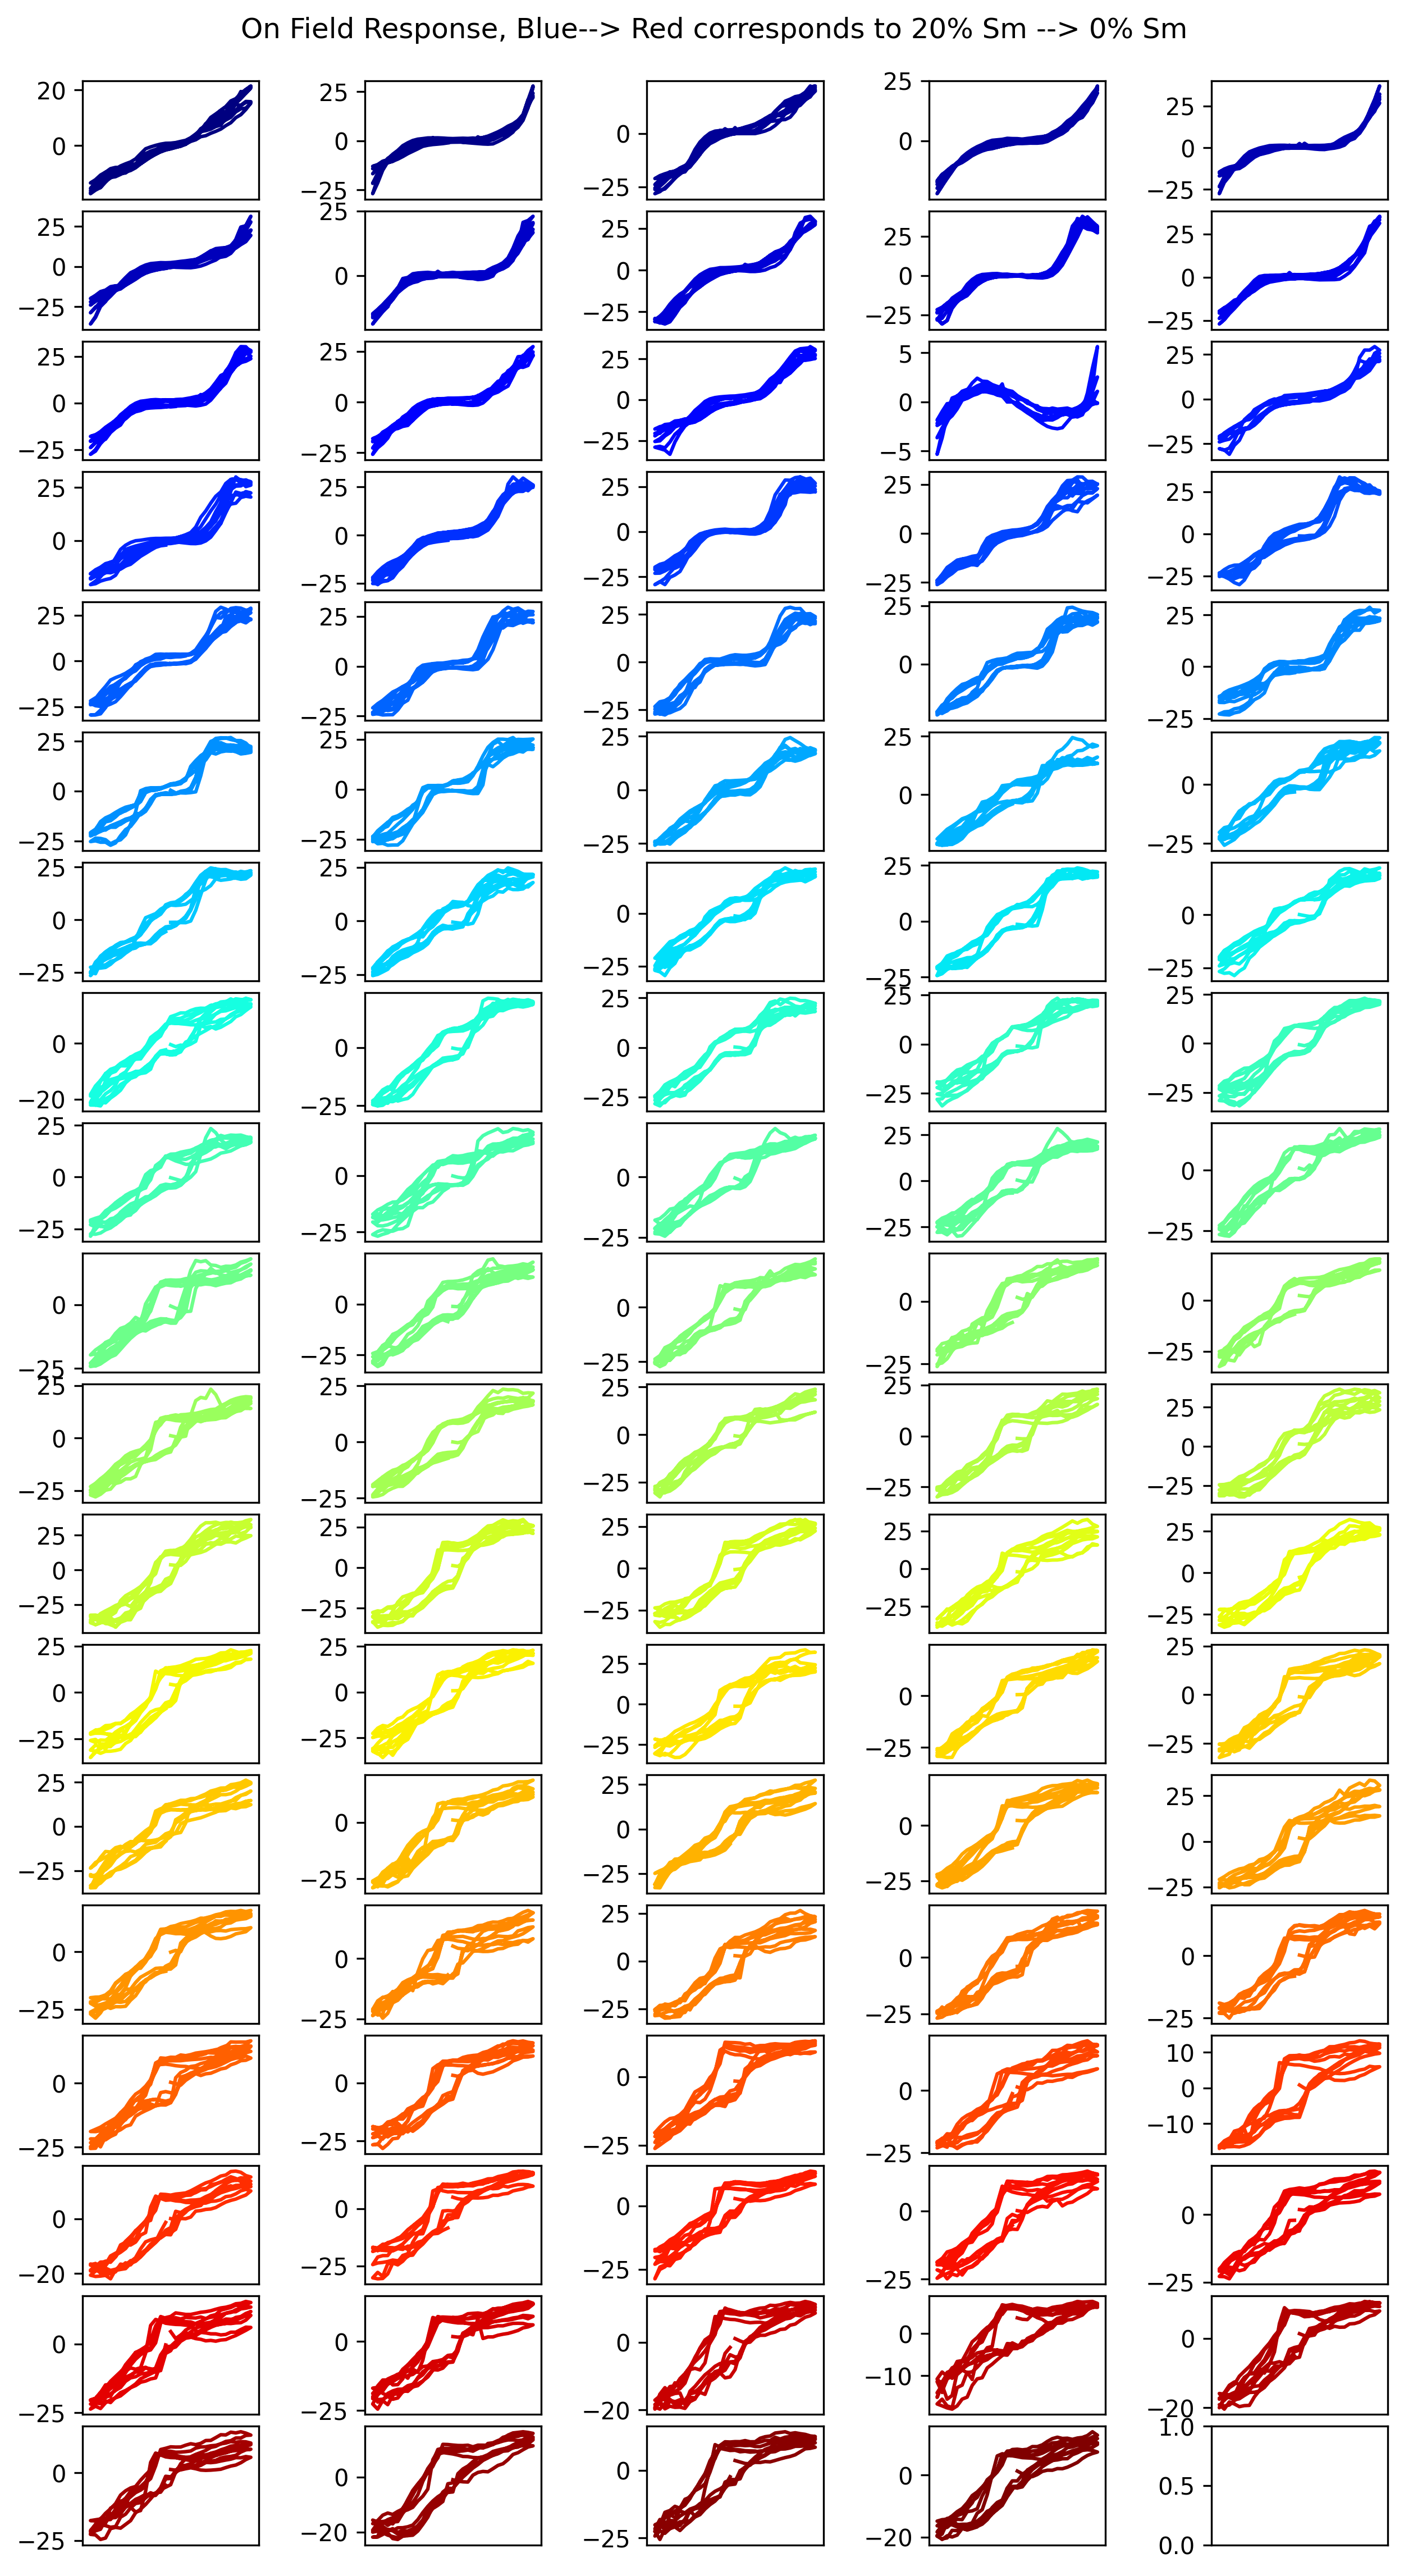

In [ ]:
color=mcp.gen_color(cmap="jet",n=94)
fig, axes = plt.subplots(19, 5, figsize=(10, 19),
                         subplot_kw={'xticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.6), dpi =300)

for ax, i in zip(axes.flat, range(94)):
  ax.plot(beps_wv, (pola_on.mean(axis = 1)[i])*1E5, c = color[i])
  #ax.set_ylim(-13, 15)
  # ax.set_ylabel ("Piezorespones (a.u.)")

fig.suptitle("On Field Response, Blue--> Red corresponds to 20% Sm --> 0% Sm", y=0.9)

In [ ]:
# Calcualte average of 3 loops for the same composition
pola_off_mean = np.mean(pola_off, axis = 1)
pola_off_mean = pola_off_mean*1E4
pola_off_mean.shape

(94, 320)

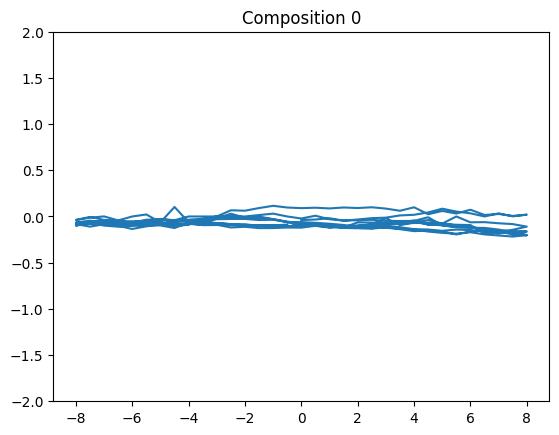

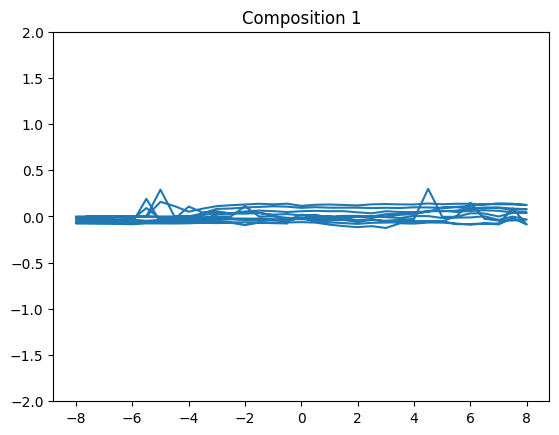

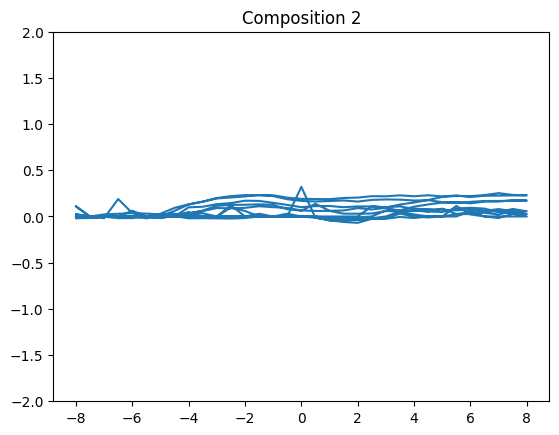

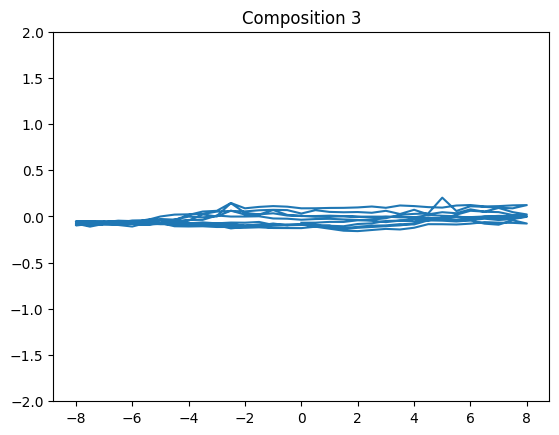

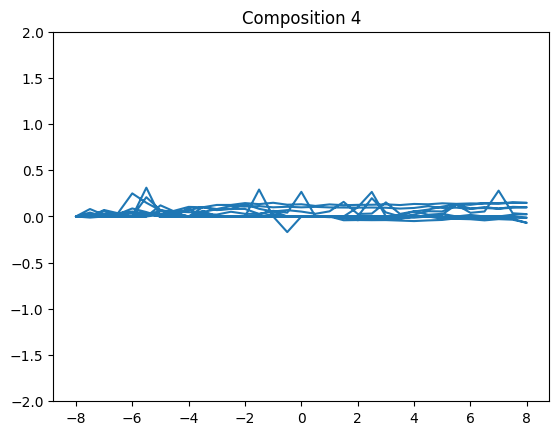

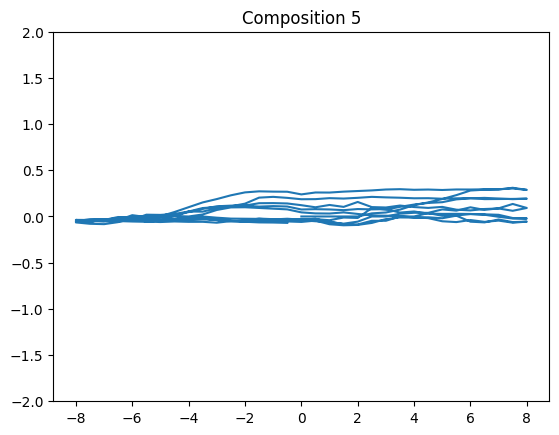

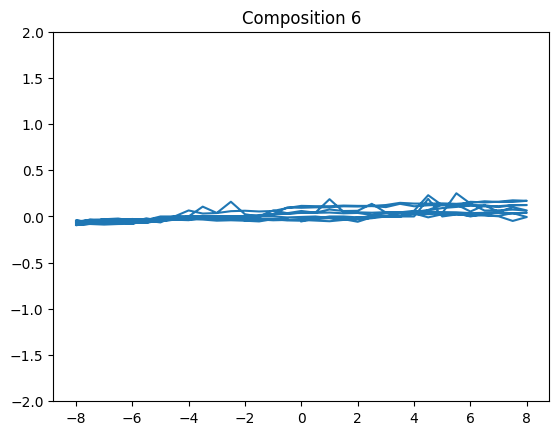

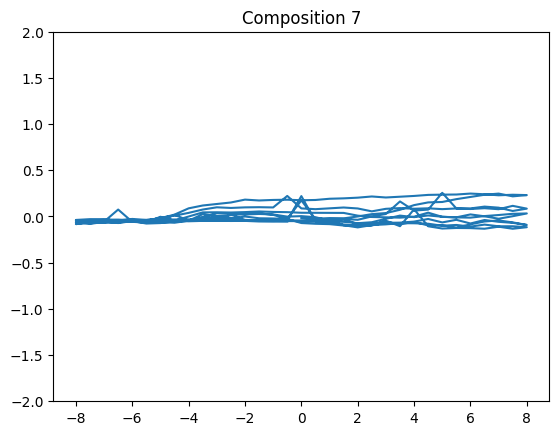

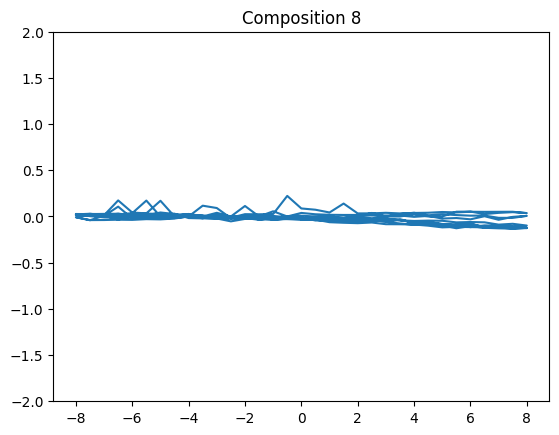

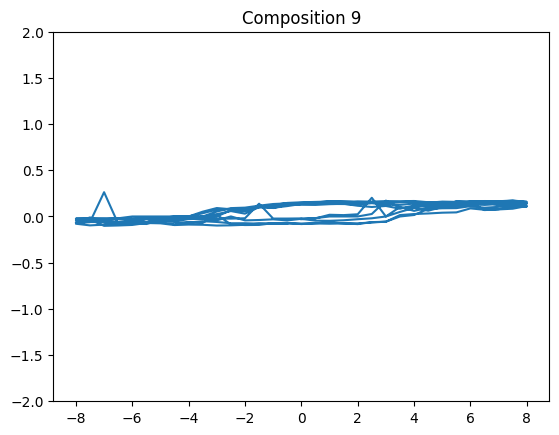

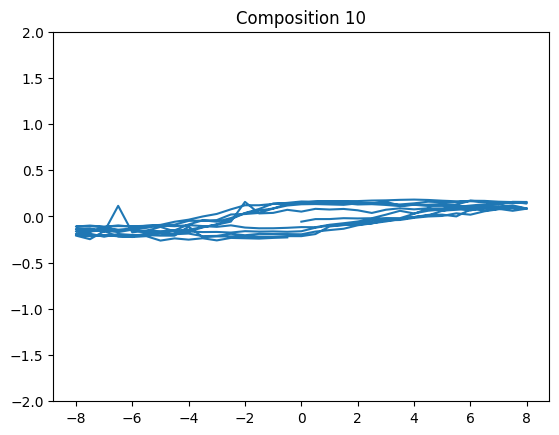

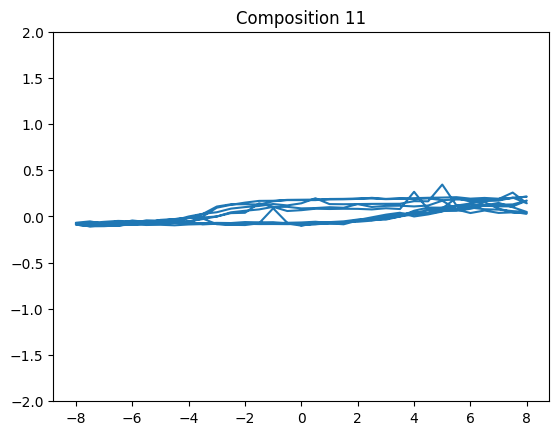

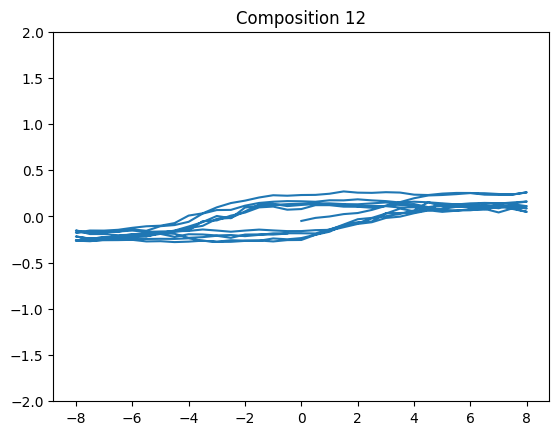

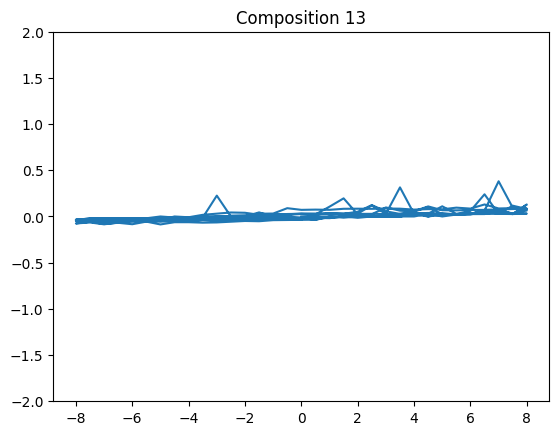

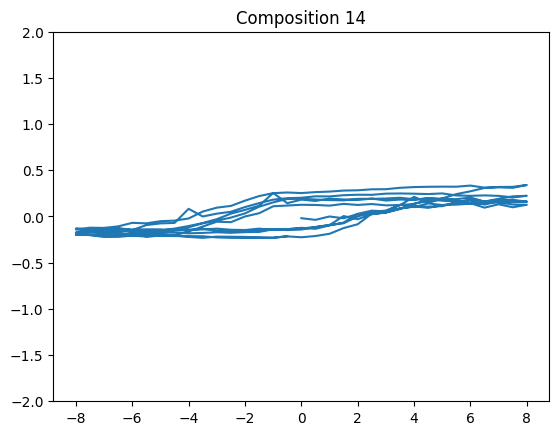

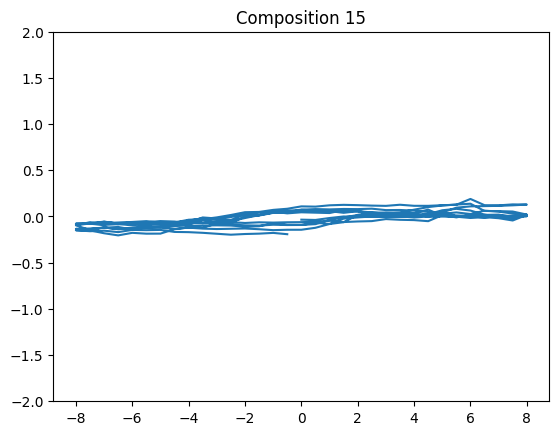

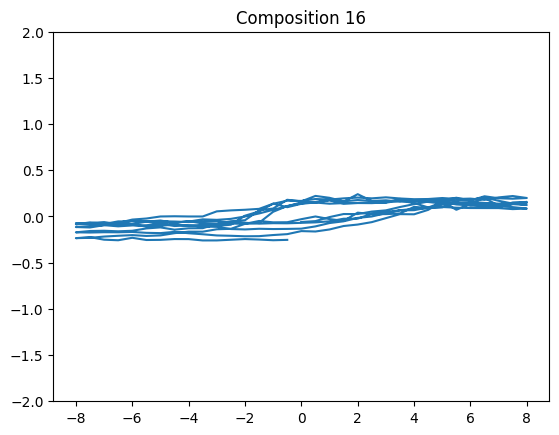

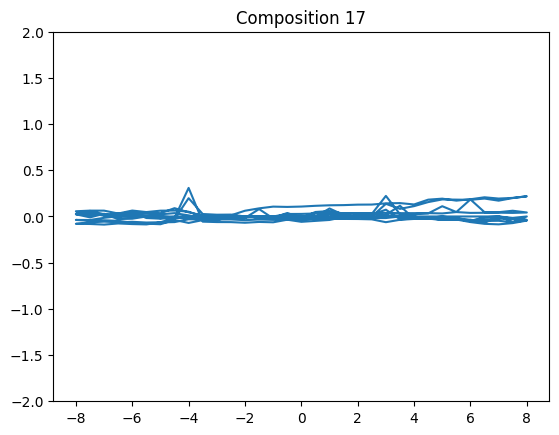

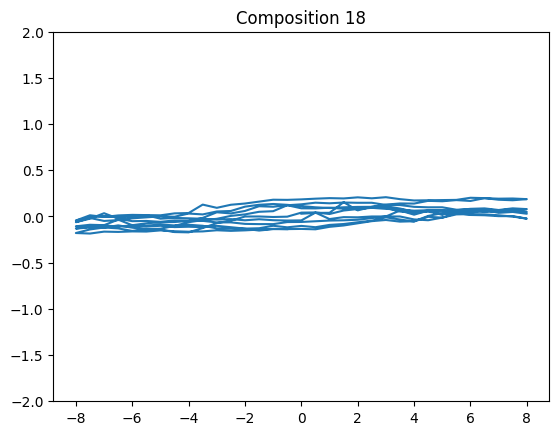

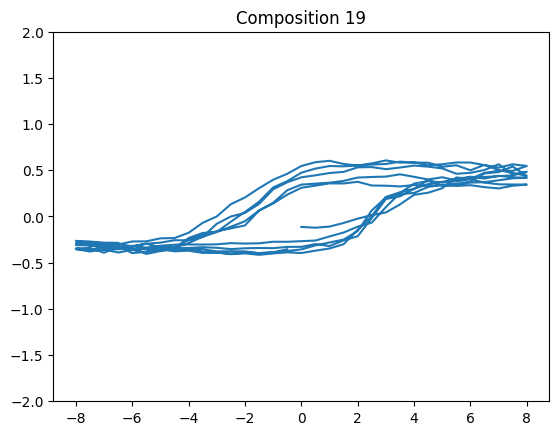

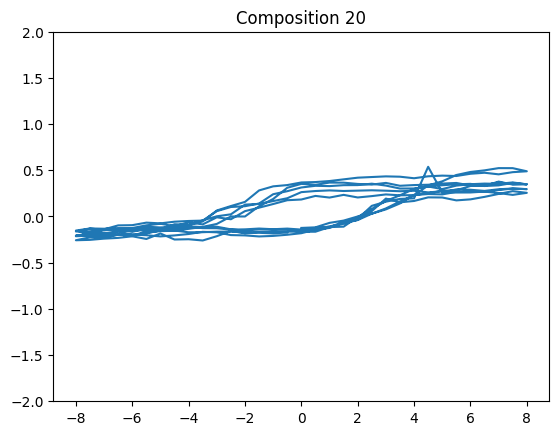

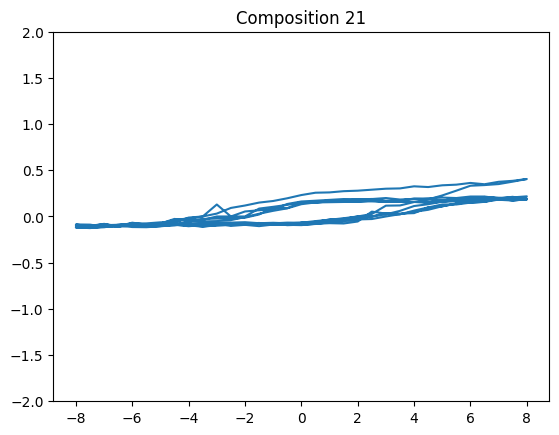

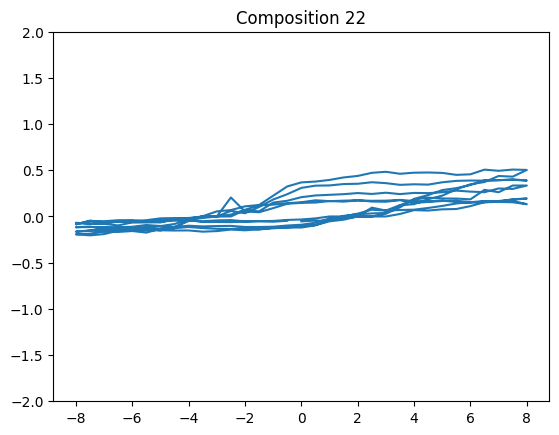

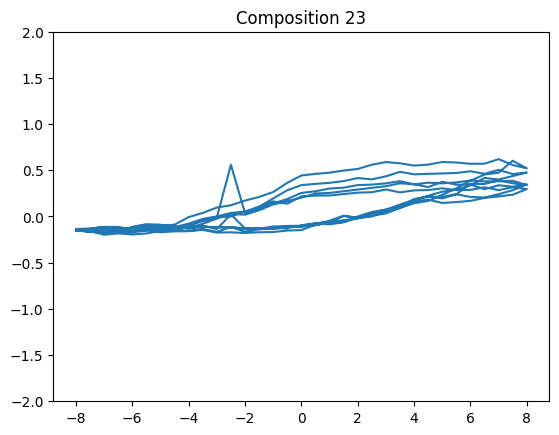

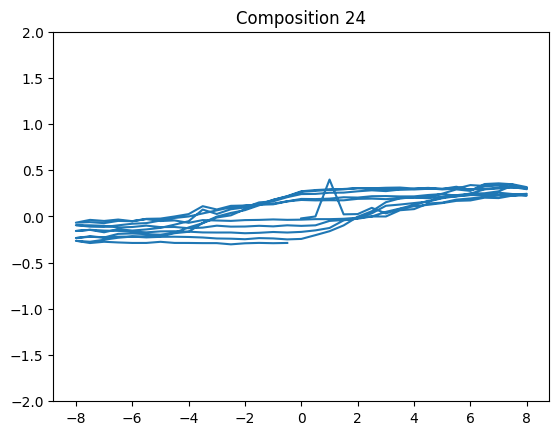

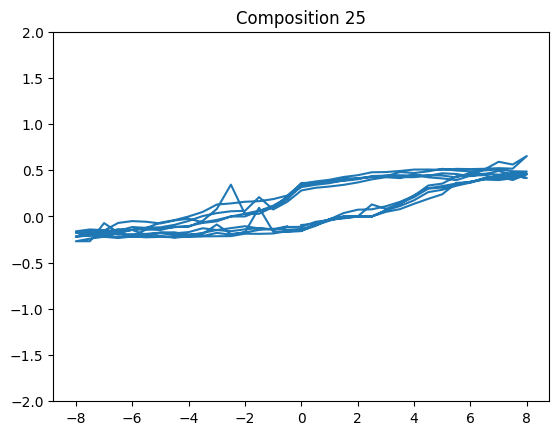

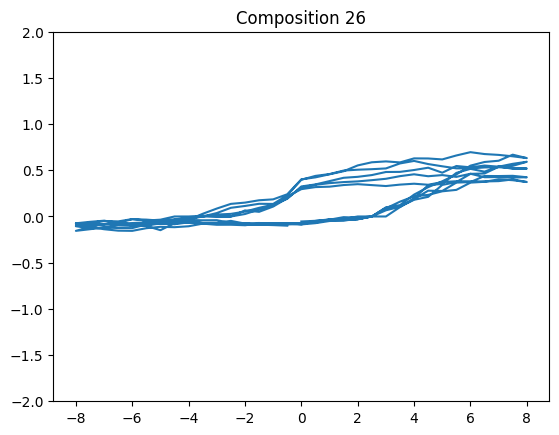

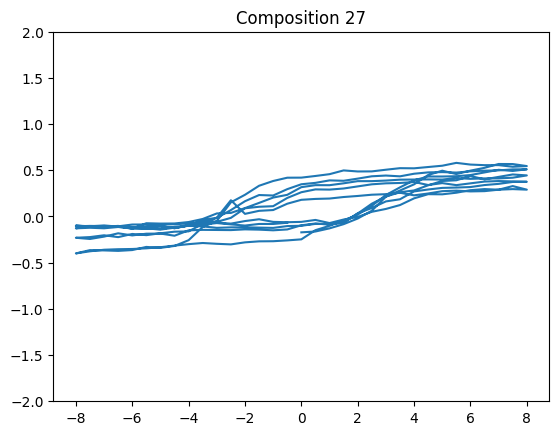

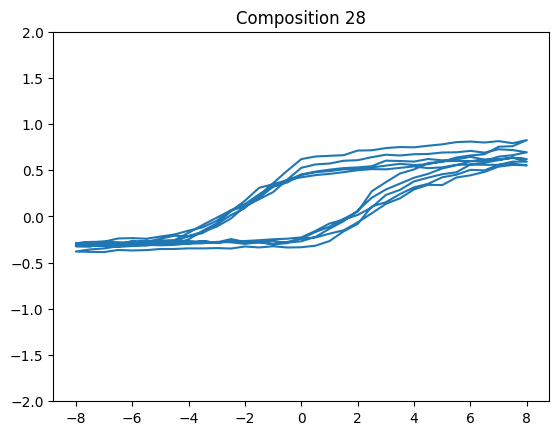

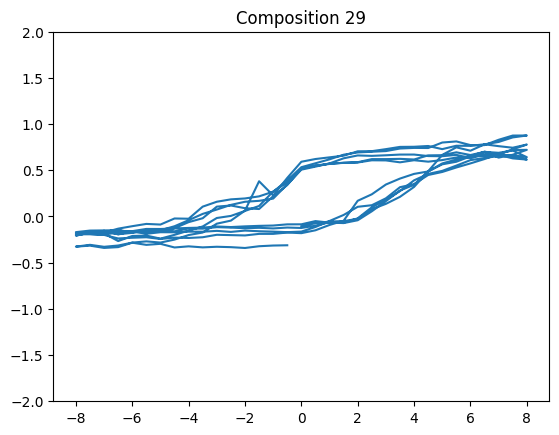

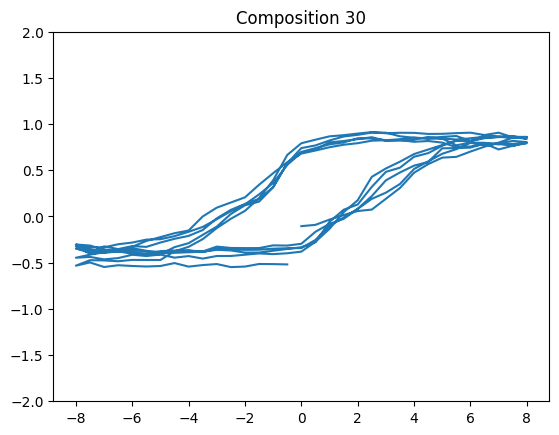

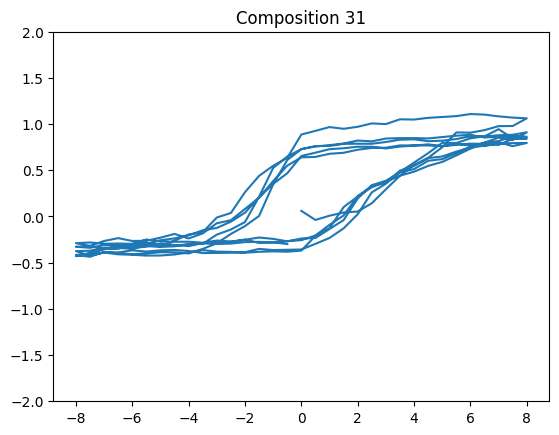

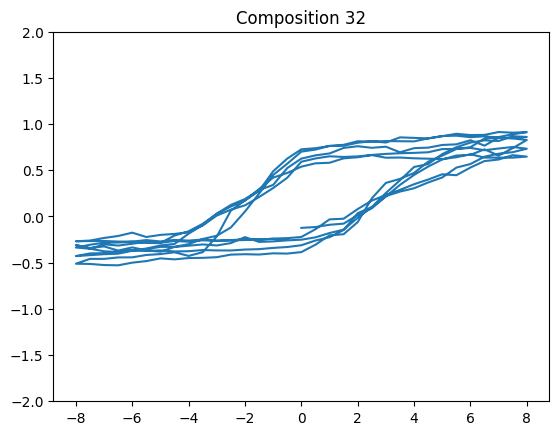

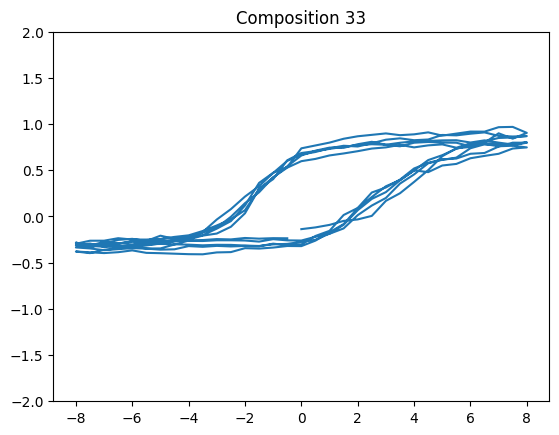

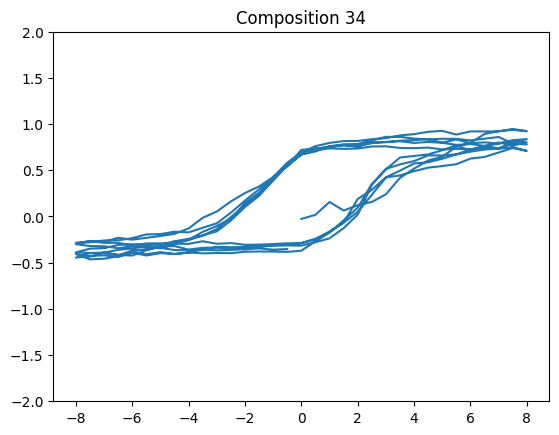

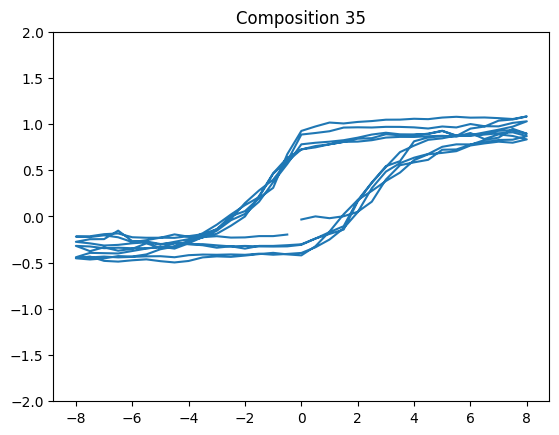

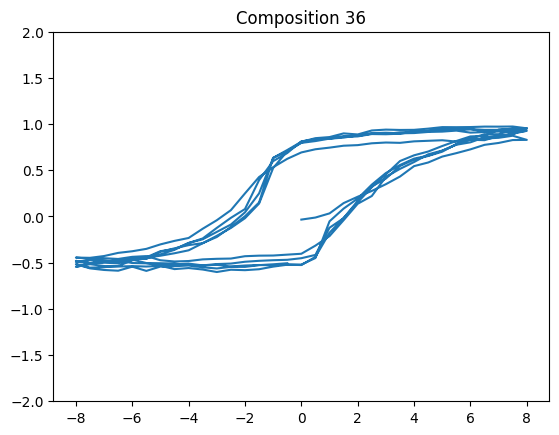

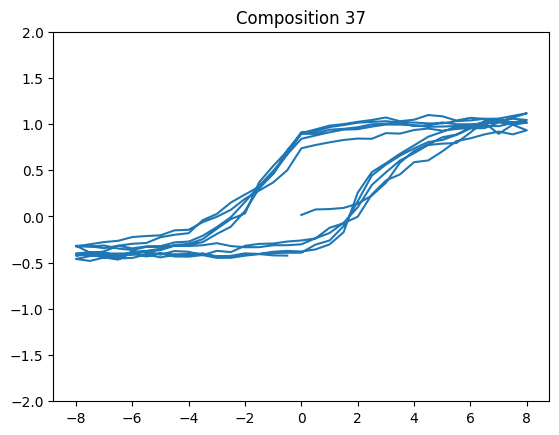

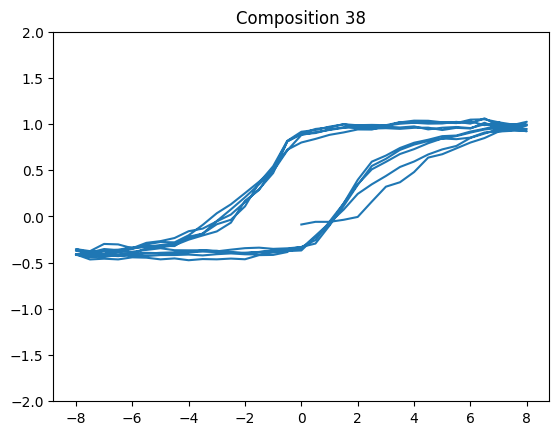

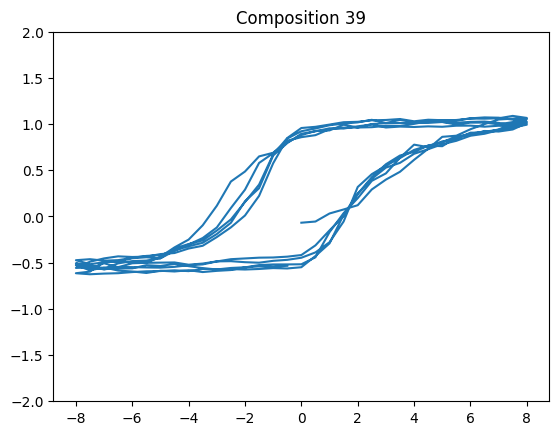

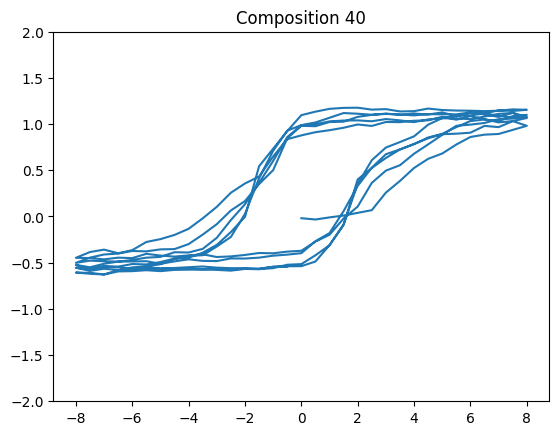

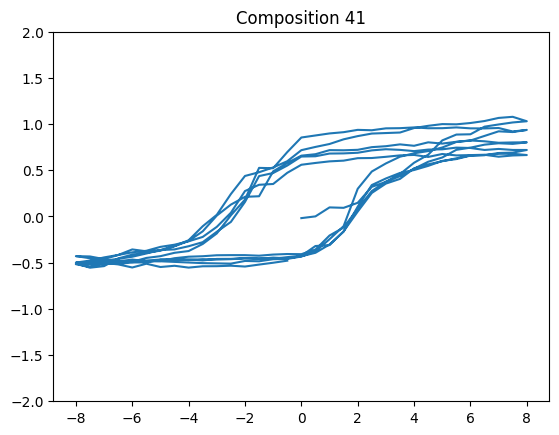

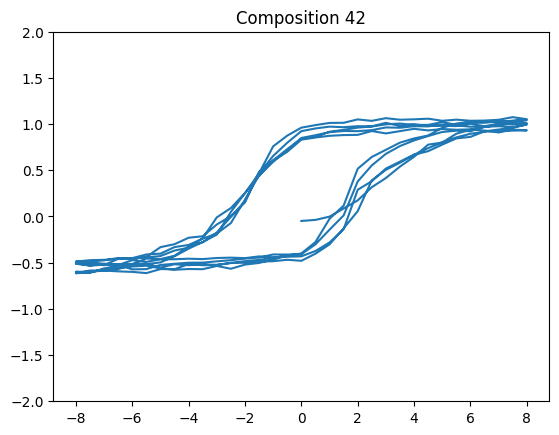

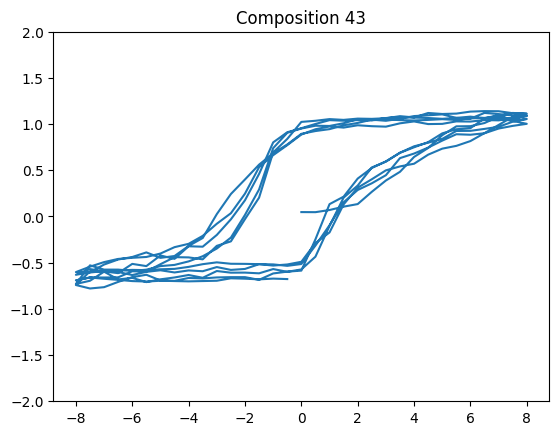

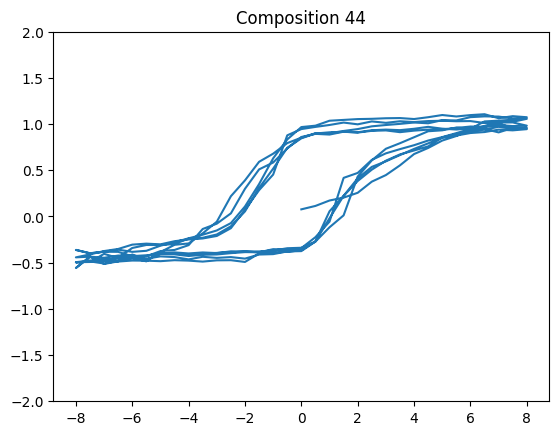

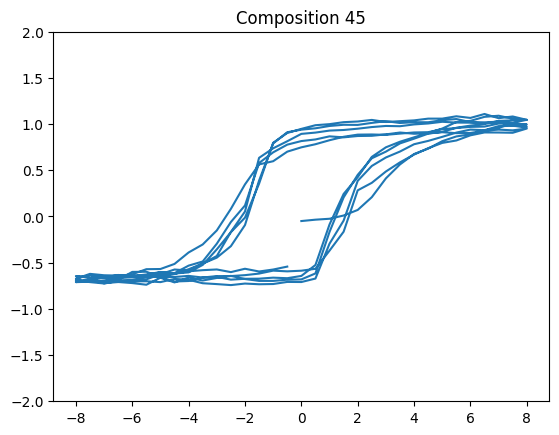

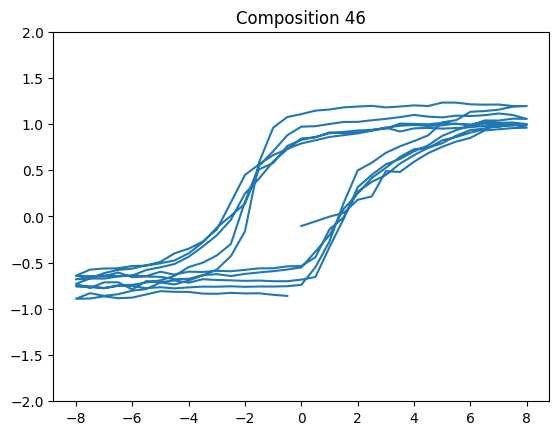

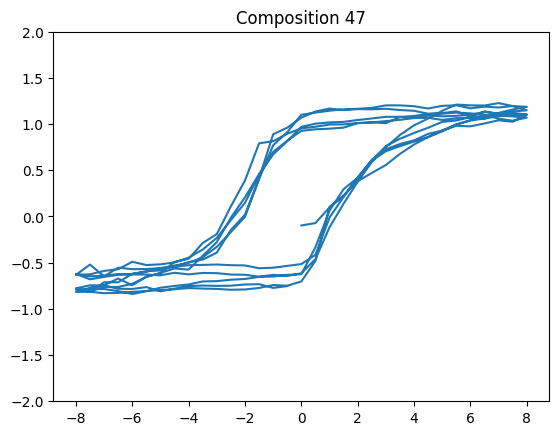

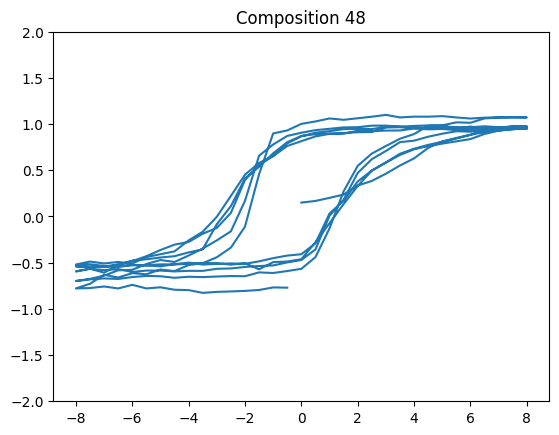

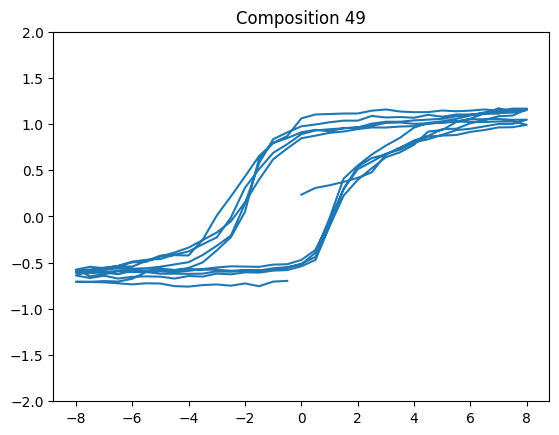

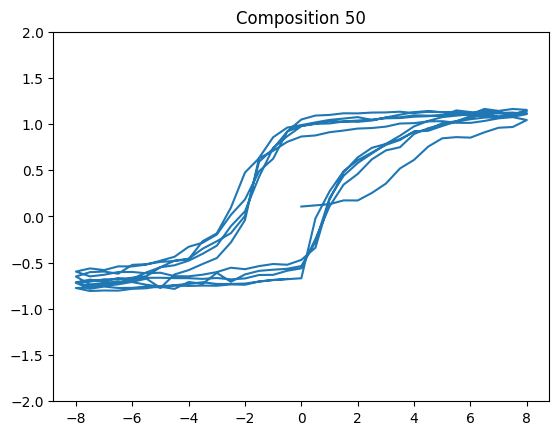

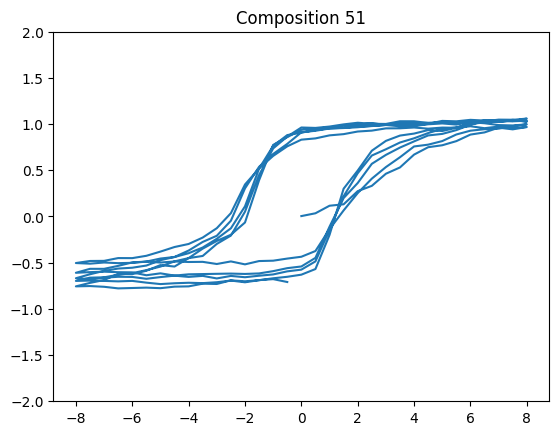

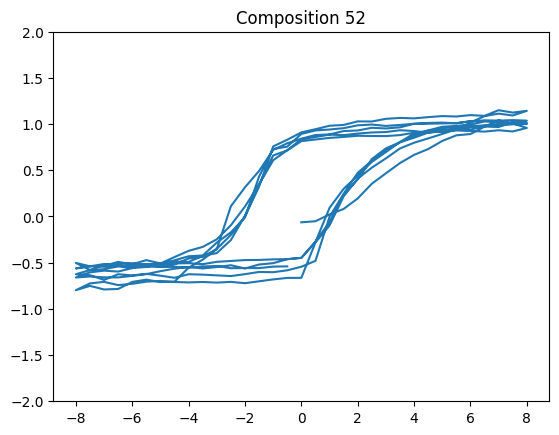

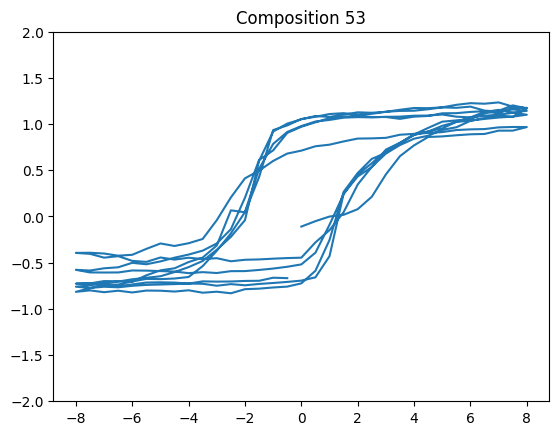

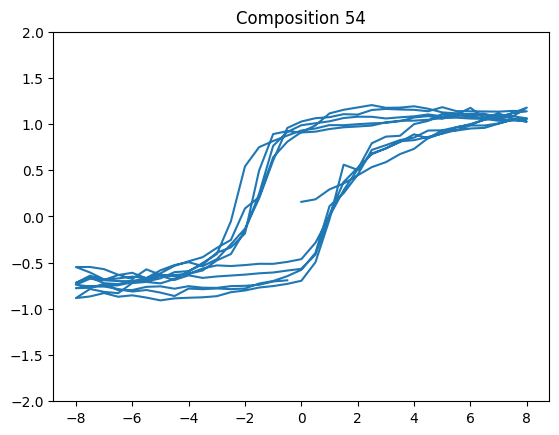

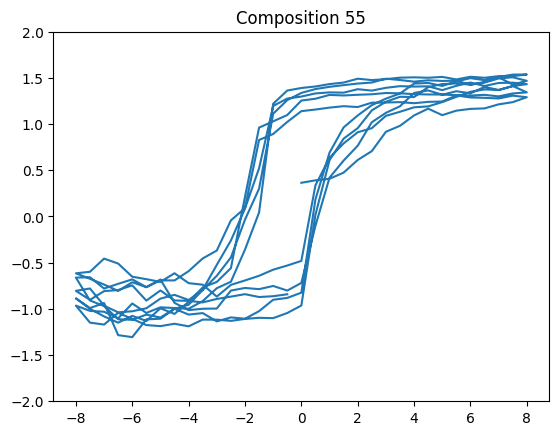

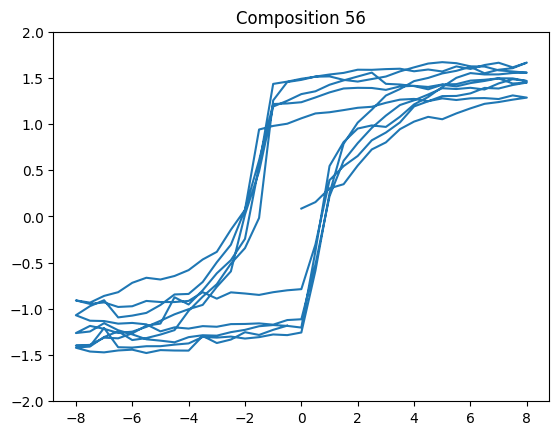

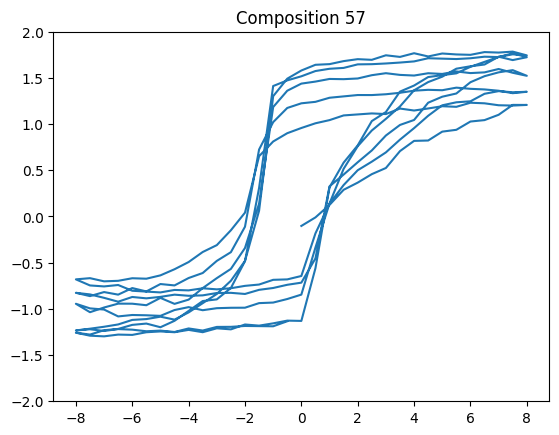

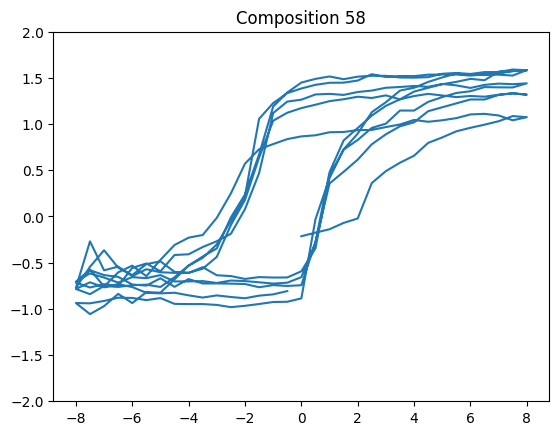

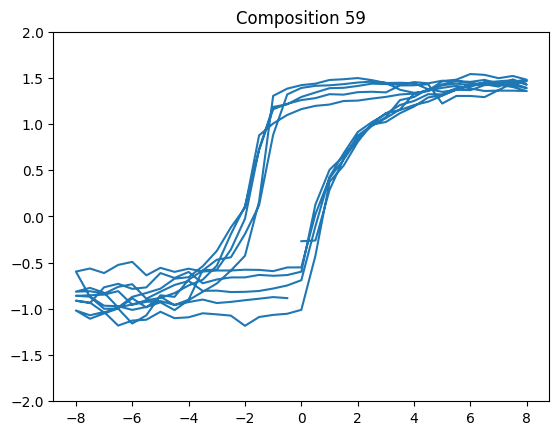

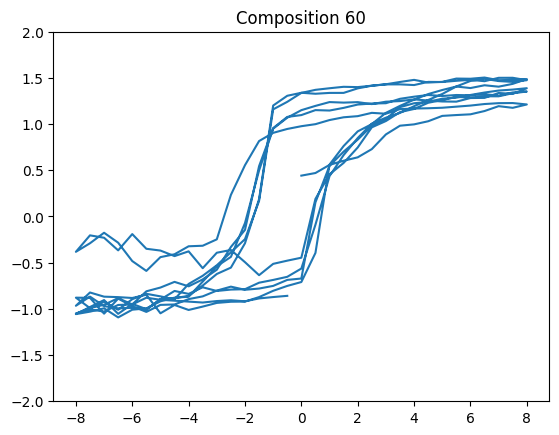

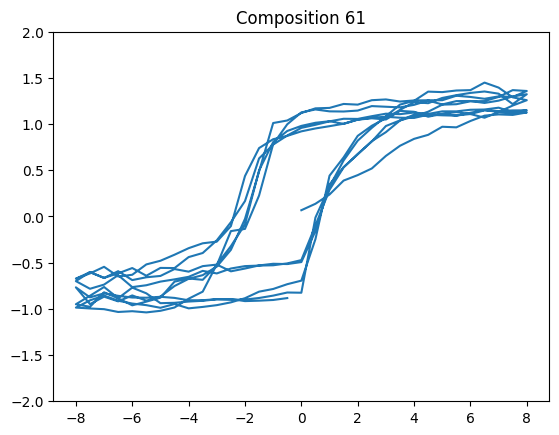

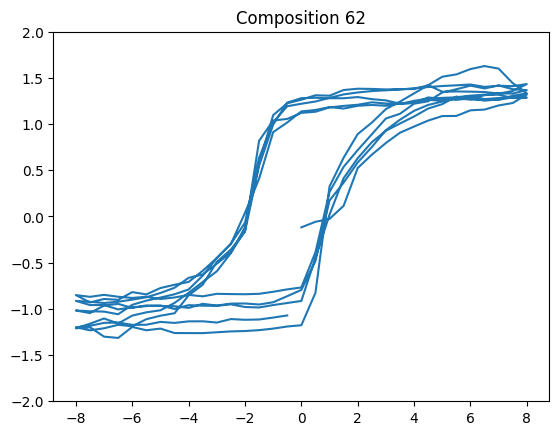

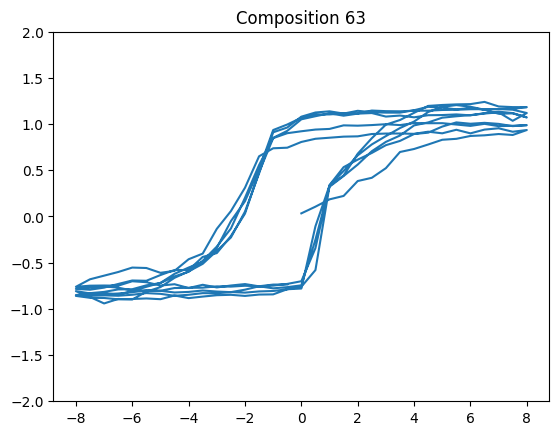

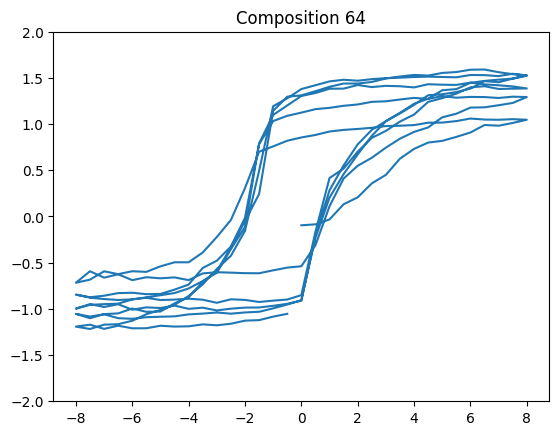

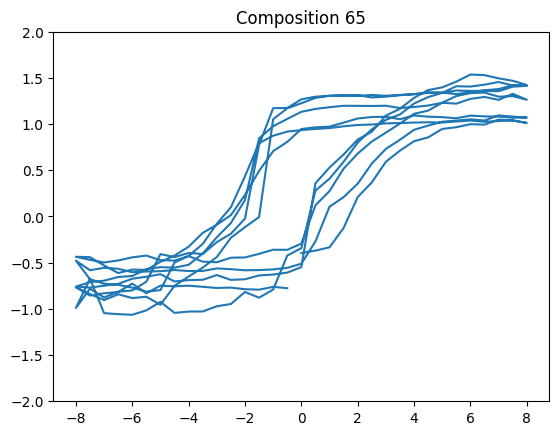

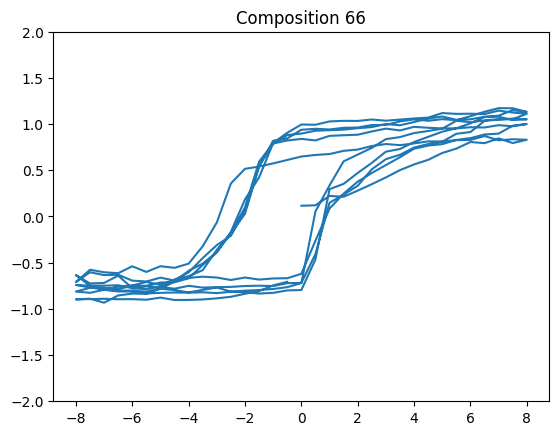

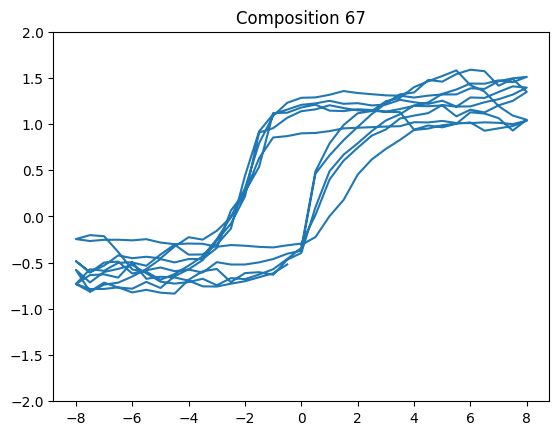

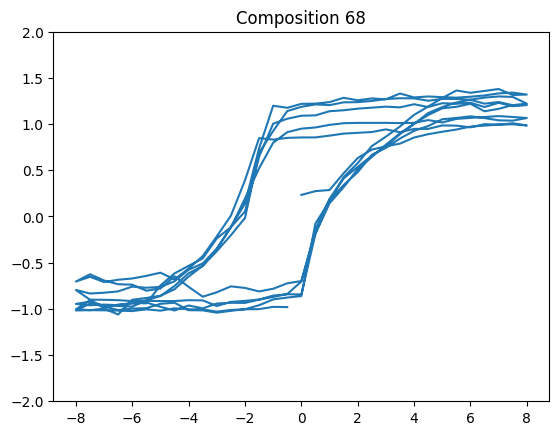

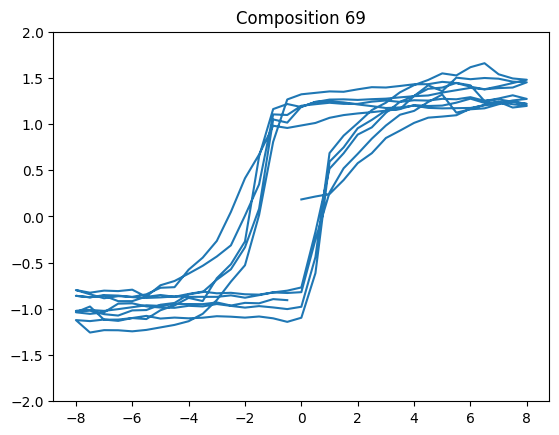

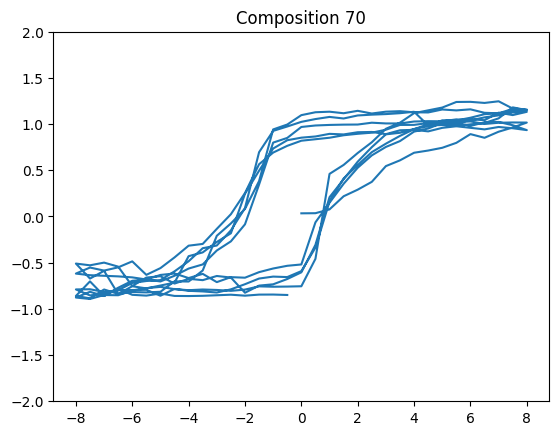

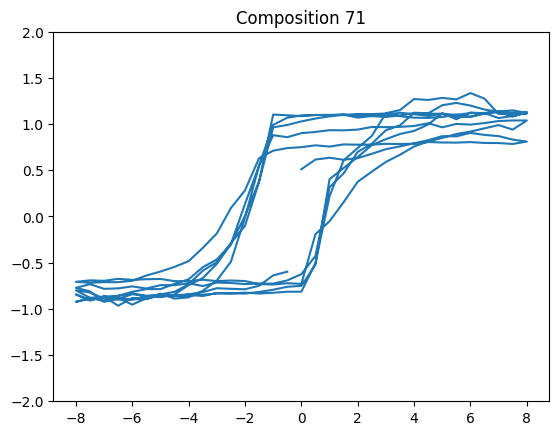

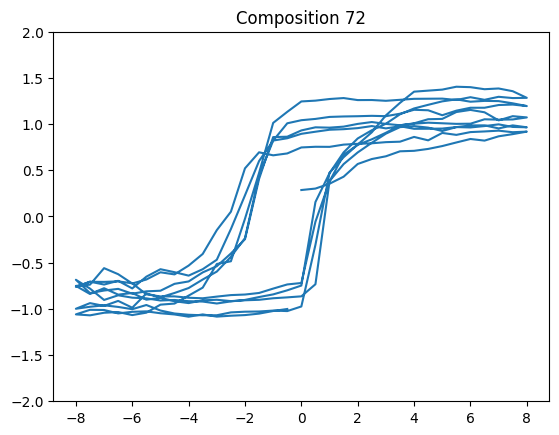

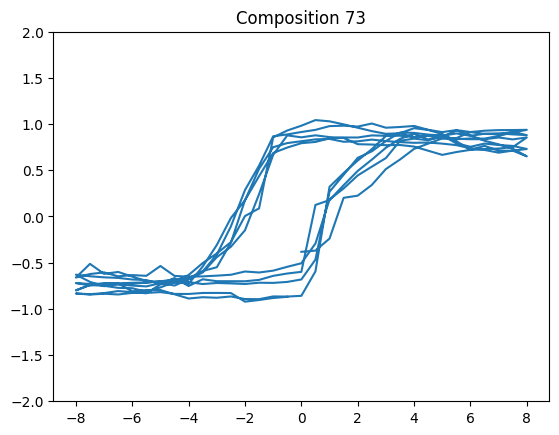

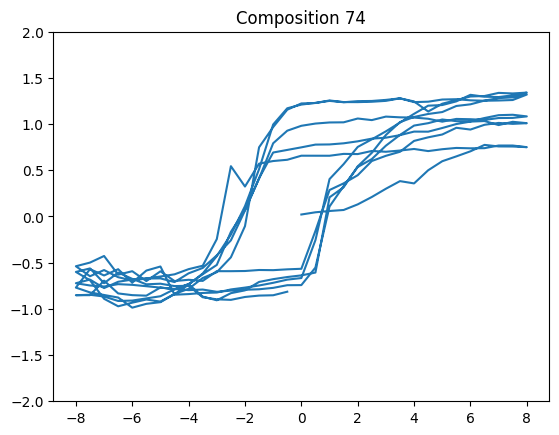

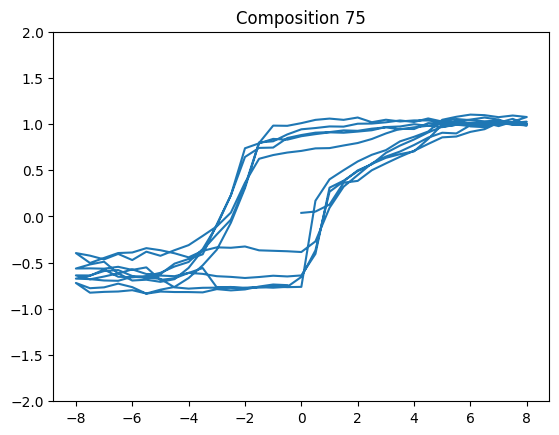

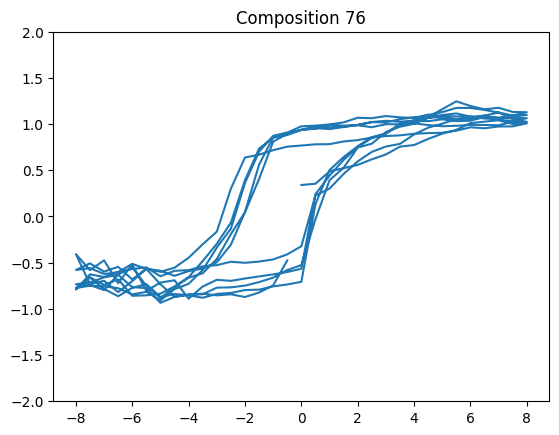

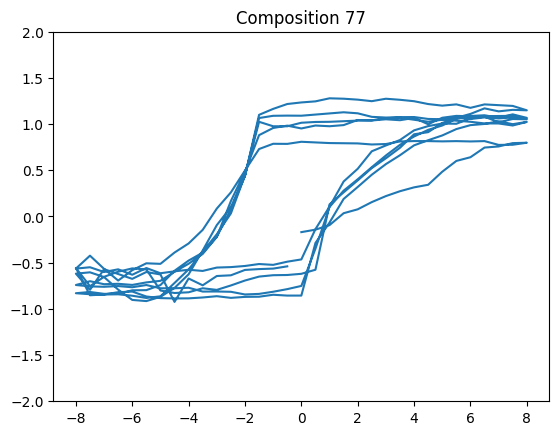

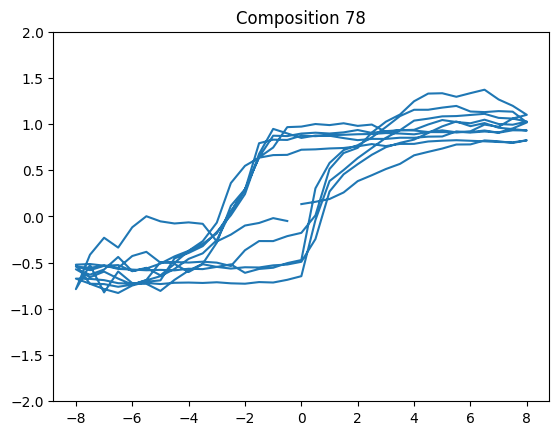

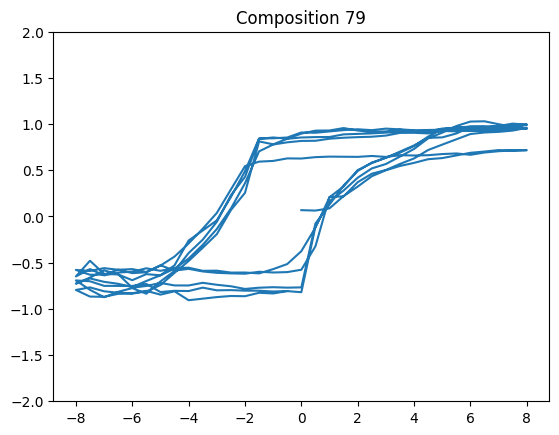

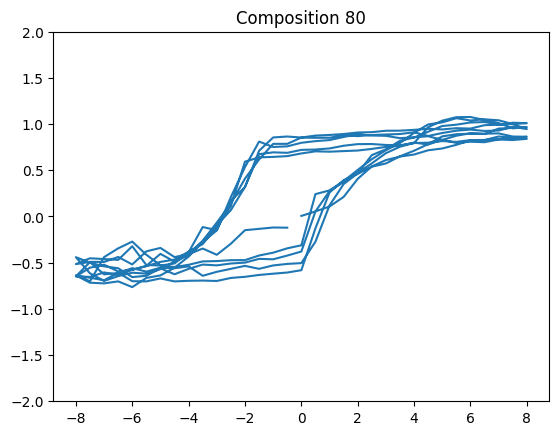

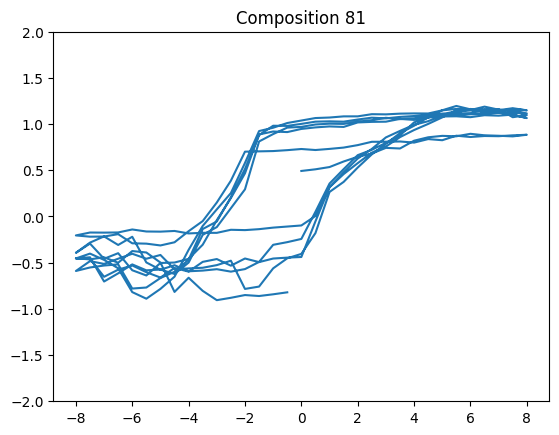

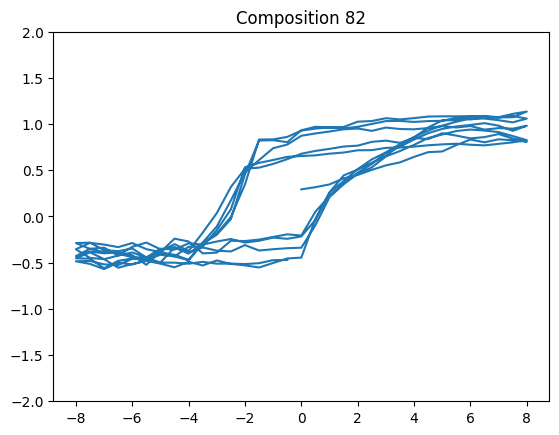

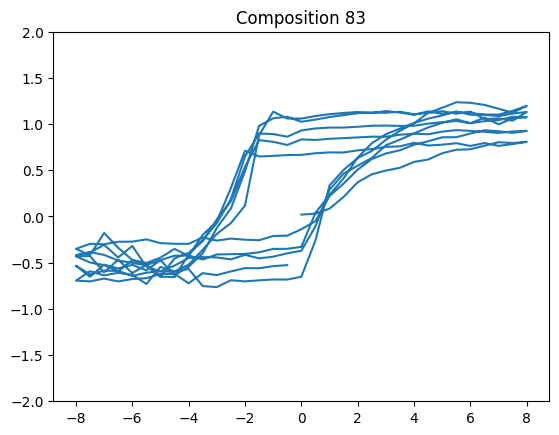

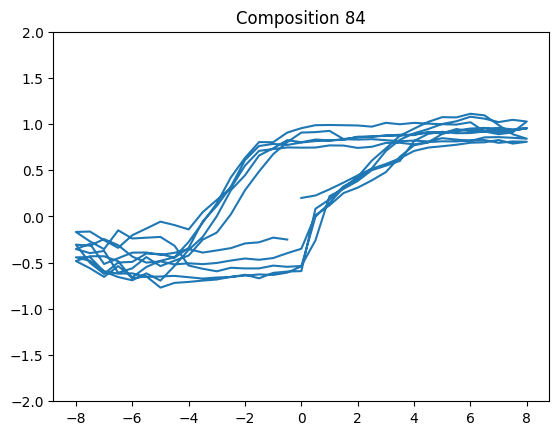

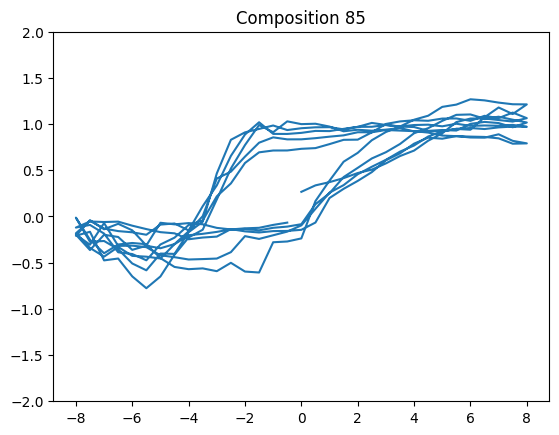

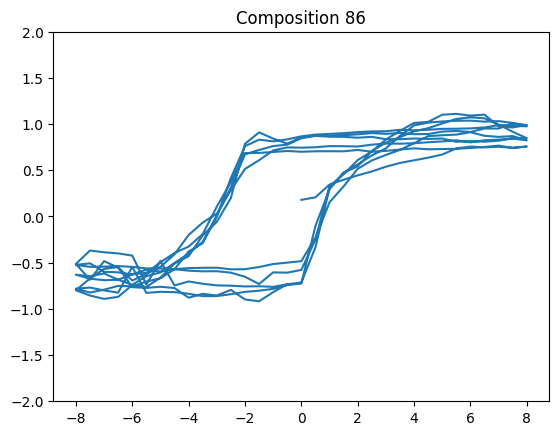

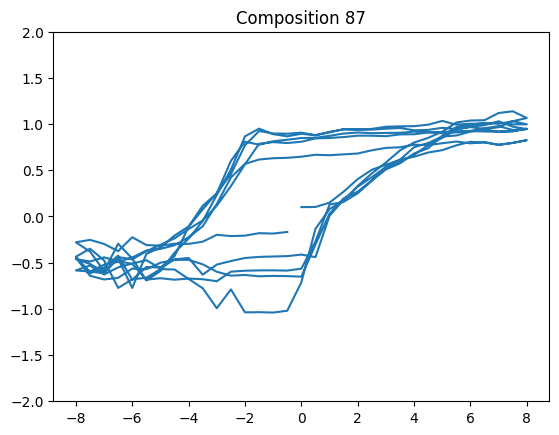

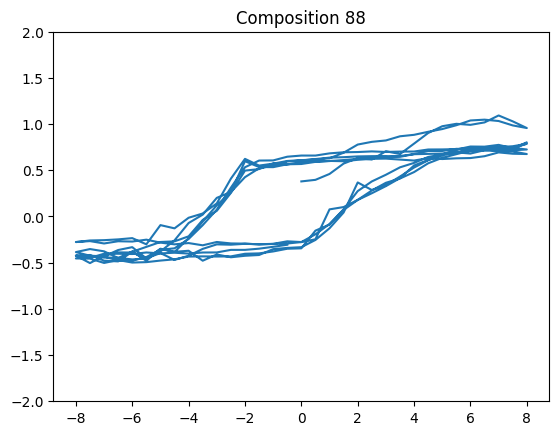

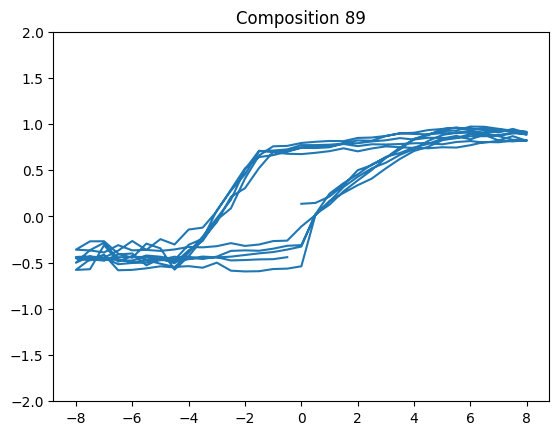

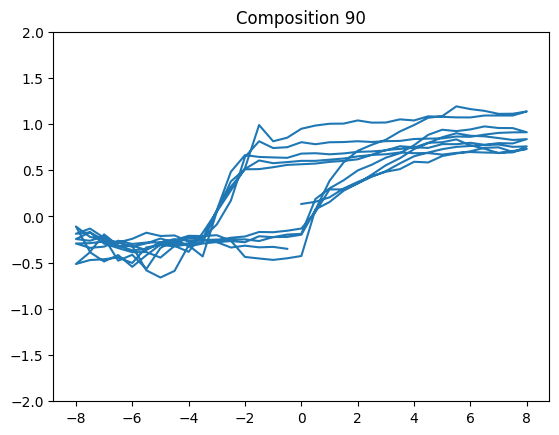

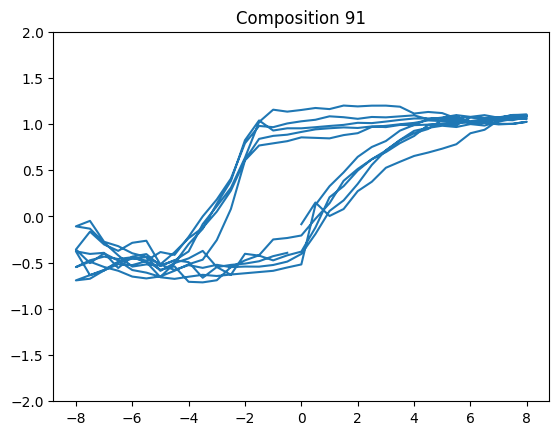

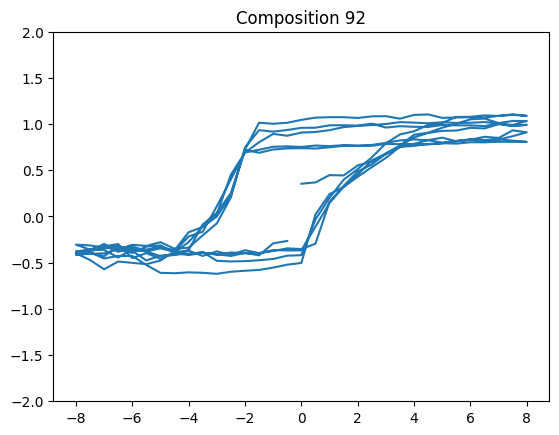

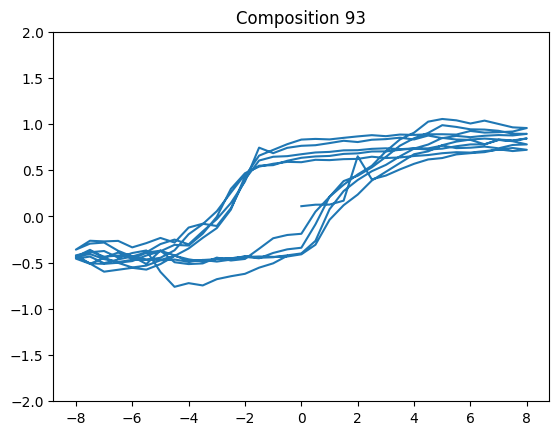

In [ ]:
# Plot loops at all compositions
for i in range(94):
  plt.plot(beps_wv, pola_off_mean[i, :])
  plt.title("Composition {}".format(i))
  plt.ylim(-2, 2)
  plt.show()


Text(0, 0.5, 'Piezoresponse (a.u.)')

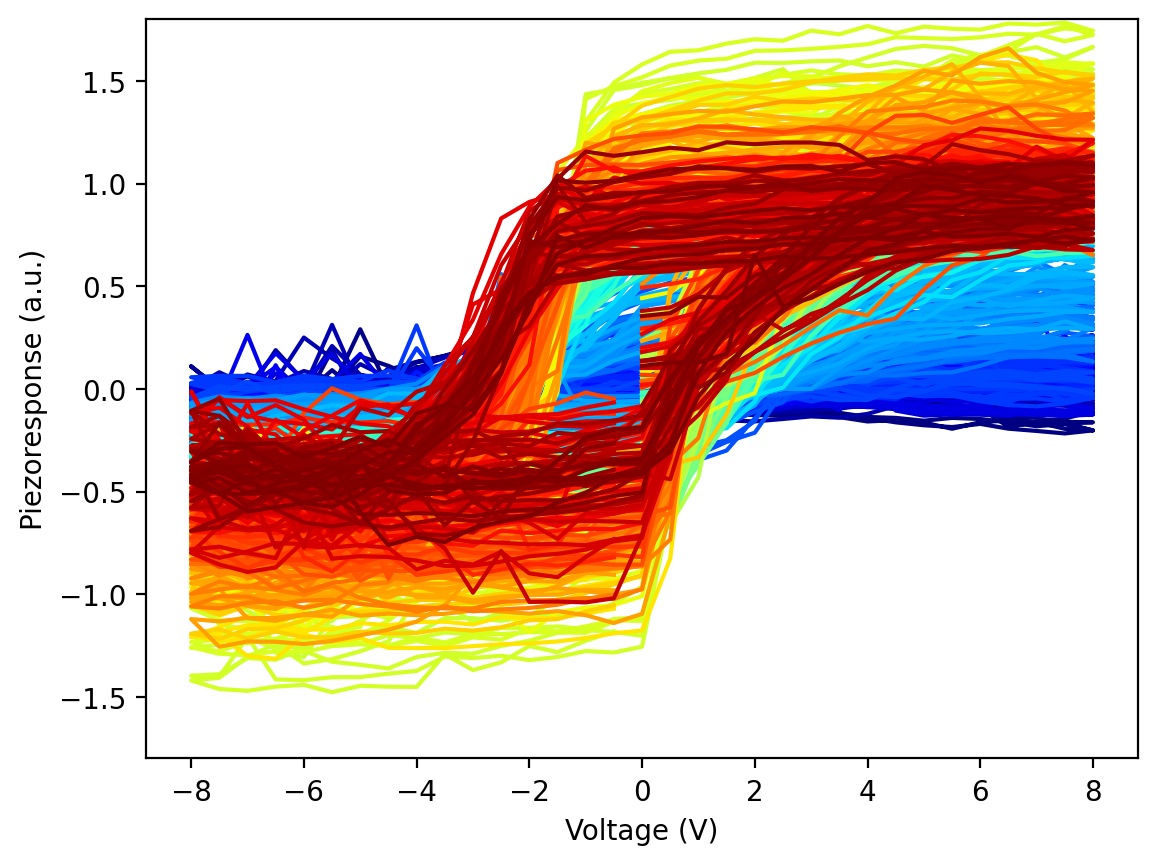

In [ ]:
# Plot all loops together
color=mcp.gen_color(cmap="jet",n=94)
plt.figure(dpi = 200)
for i in range (94):
  plt.plot(beps_wv, pola_off_mean[i,], color = color[i])
plt.ylim(-1.8, 1.8)
plt.xlabel("Voltage (V)")
plt.ylabel("Piezoresponse (a.u.)")

## Analysis--calculate loops area, coercive field, nucleation voltage

In [ ]:
#help function
def separate_top_bottom(loop, wv):
  # bottom half
  bm = np.asarray([])
  bm_wv  = np.asarray([])
  bm = np.append(bm, loop[:16])
  bm_wv = np.append(bm_wv, wv[:16])
  for k in range (4):
    bm = np.append(bm, loop[(k*64+48): (k*64+80)])
    bm_wv = np.append(bm_wv, wv[(k*64+48): (k*64+80)])
  bm = np.append(bm, loop[304: 320])
  bm_wv = np.append(bm_wv, wv[304: 320])

  # top half
  tp = np.asarray([])
  tp_wv = np.asarray([])
  for k in range (5):
    tp = np.append(tp,loop[(k*64+16):(k*64+48)])
    tp_wv = np.append(tp_wv,wv[(k*64+16):(k*64+48)])

  return tp, bm, tp_wv, bm_wv

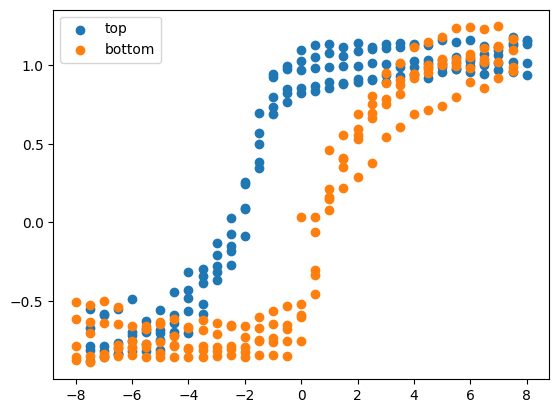

In [ ]:
lp = pola_off_mean[70]
tp, bm, tp_wv, bm_wv = separate_top_bottom(lp, beps_wv)

plt.scatter(tp_wv, tp, label = 'top')
plt.scatter(bm_wv, bm, label = 'bottom')
plt.legend()

In [ ]:
#help function
def lp_area(loop, wv):
  # separate botoom loop and top loop
  tp, bm, _, _ = separate_top_bottom(loop, wv)

  # loop area = toploop - bottom loop
  loop_area = (tp - bm).sum()

  return loop_area

def cor_voltage(loop, wv):
  # separate botoom loop and top loop
  tp, bm, tp_wv, bm_wv = separate_top_bottom(loop, wv)
  single_bm_wv = bm_wv[16:48] # wv for a single cycle
  single_tp_wv = tp_wv[:32] # wv for a single cycle

  # reshape top loop and bottom loop into cycles
  rtp = tp.reshape(5, 32)
  rbm = bm[16:-16].reshape(4, 32)

  # calculate the point cloest to polaration=0
  rtp_abs = np.abs(rtp.mean(0)-0)  # the minimum point is cloest to 0
  rbm_abs = np.abs(rbm.mean(0)-0)  # the minimum point is cloest to 0

  cor_vol_bm = single_bm_wv[rbm_abs.argmin()]  # the corresponding voltage is coercive voltage
  cor_vol_tp = single_tp_wv[rtp_abs.argmin()]

  return cor_vol_tp, cor_vol_bm

def nucleation_voltage(loop, wv):
  # separate botoom loop and top loop
  tp, bm, tp_wv, bm_wv = separate_top_bottom(loop, wv)
  single_bm_wv = bm_wv[16:48] # wv for a single cycle
  single_tp_wv = tp_wv[:32] # wv for a single cycle

  # reshape top loop and bottom loop into cycles
  rtp = tp.reshape(5, 32)
  rbm = bm[16:-16].reshape(4, 32)

  # calculate the derivate and the largest gradient point
  ytp = rtp.mean(0)
  xtp = single_tp_wv
  dydx = np.gradient(ytp, xtp)  # calcualte derivate
  nucleation_tp = xtp[dydx.argmax()]  # the voltage at largest derivate is nucleation voltage

  ybm = rbm.mean(0)
  xbm = single_bm_wv
  dydx = np.gradient(ybm, xbm)  # calcualte derivate
  nucleation_bm = xbm[dydx.argmax()]  # the voltage at largest derivate is nucleation voltage

  return nucleation_tp, nucleation_bm

In [ ]:
# Calculate loop area, coercive field, and nucleation voltage
lpareas = np.zeros(94)
cor_voltages = np.zeros((2, 94))
nucleation_voltages = np.zeros((2, 94))
for i in range(94):
  lpareas[i] = lp_area(pola_off_mean[i], beps_wv)
  cor_voltages[0, i], cor_voltages[1, i] = cor_voltage(pola_off_mean[i], beps_wv)
  nucleation_voltages[0, i], nucleation_voltages[1, i] = nucleation_voltage(pola_off_mean[i], beps_wv)


In [ ]:
# comid1 = np.linspace (80, 0, 74)
# start = np.zeros(10)
# start = start[:] + 100
# end = np.zeros(10)
# comid1 = np.append(start, comid1)
# comid= np.append(comid1, end)


In [ ]:
id = np.linspace (80, 100, 5, dtype=int)
ididx = np.linspace(0, 84, 5, dtype=int)

comid = np.arange(94)

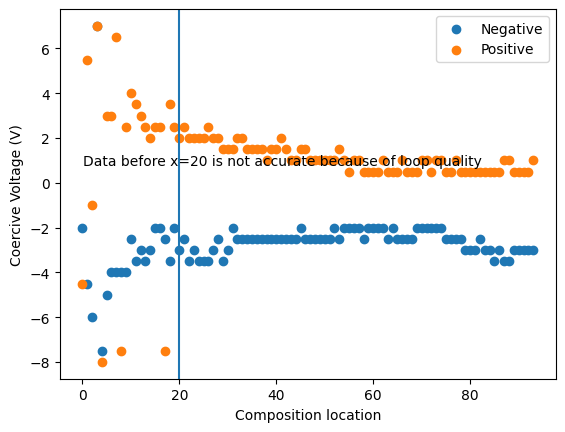

In [ ]:
plt.figure(dpi = 100)
plt.scatter(comid, cor_voltages[0], label = "Negative")
plt.scatter(comid, cor_voltages[1], label = "Positive")
plt.axvline(x = 20)
plt.text(0.2, 0.8, "Data before x=20 is not accurate because of loop quality")
plt.xlabel("Composition location")
plt.ylabel("Coercive Voltage (V)")
plt.legend()

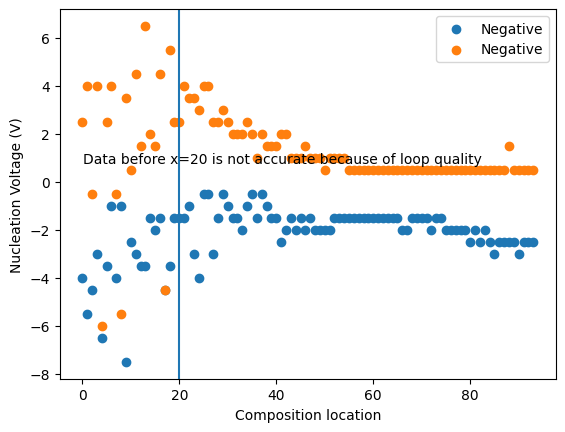

In [ ]:
plt.figure(dpi = 100)
plt.scatter(comid, nucleation_voltages[0], label = "Negative")
plt.scatter(comid, nucleation_voltages[1], label = "Negative")
plt.xlabel("Composition location")
plt.ylabel("Nucleation Voltage (V)")
plt.axvline(x = 20)
plt.text(0.2, 0.8, "Data before x=20 is not accurate because of loop quality")
plt.legend()

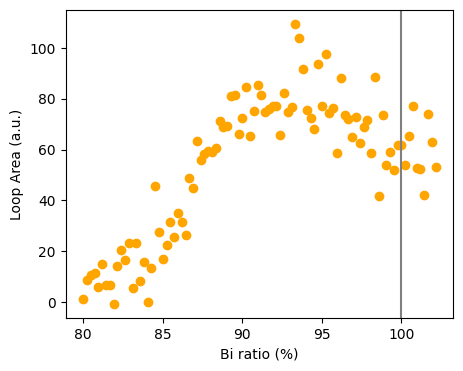

In [ ]:
comid = np.arange(94)

plt.figure(figsize = (5, 4), dpi = 100)
plt.scatter(comid, lpareas, c = "orange")
plt.xlabel("Bi ratio (%)")
plt.xticks(ididx, id)
plt.ylabel("Loop Area (a.u.)")
plt.axvline(x= 84, c = "Gray")
# plt.colorbar(label= "Coercive Voltage (V)")

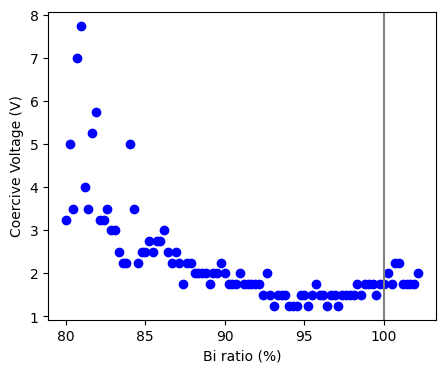

In [ ]:
cor = (np.abs(cor_voltages[0]) + np.abs(cor_voltages[1]))/2
plt.figure(figsize = (5, 4), dpi = 100)
plt.scatter(comid, cor, c = "blue")
plt.xlabel("Bi ratio (%)")
plt.xticks(ididx, id)
plt.ylabel("Coercive Voltage (V)")
plt.axvline(x= 84, c = "Gray")

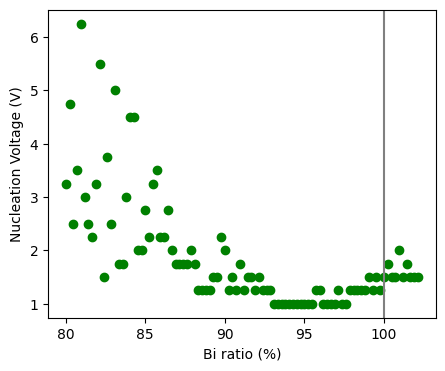

In [ ]:
cor = (np.abs(nucleation_voltages[0]) + np.abs(nucleation_voltages[1]))/2
plt.figure(figsize = (5, 4), dpi = 100)
plt.scatter(comid, cor, c = "g")
plt.xlabel("Bi ratio (%)")
plt.xticks(ididx, id)
plt.ylabel("Nucleation Voltage (V)")
plt.axvline(x= 84, c = "Gray")